<a href="https://colab.research.google.com/github/Marcus-Son/Classification_and_Calibration_of_Dysarthric_Speech/blob/yaejoon/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%84%EC%B2%98%EB%A6%AC_yaejoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Term Project

### Team 4 Final Project Presentation
- Member : 손민혁 여홍수 오예준 우명균

</br>

#### 💬 **Github Repository**
- https://github.com/Marcus-Son/Classification_and_Calibration_of_Dysarthric_Speech/tree/master

### ---------------------------------------------------------------------------------------------------
# 📣 구음장애 발화 데이터 기반 분류 및 진단 성능 개선
### ---------------------------------------------------------------------------------------------------

### 💬 CONTENTS
1. Motivation
2. Description of the Dataset
3. Process Overview
4. Preprocessing
5. Evaluation
6. Modeling
7. Results
8. Conclusion
9. References & Github

### 📌 1. Motivation

#### 💬 연구 배경
- 최근 10 년간 음성 질환 환자가 전 연령대에서 증가하고 있으며, 특히 60세 이상에서 더욱 두드러짐. 이러한 구음장애의 조기 진단과 치료를 통한 의료 비용 절감을 목표로, 전통적인 청각지각 진단의 한계를 극복하기 위해 구음장애 발화 데이터에 CNN 기반 딥러닝 방법을 적용하는 새로운 접근법을 도입함. 그 중에 뇌신경장애를 일으킬 수 있는 뇌종양은 전두엽 부위에 생기면 언어장애를 유발하기 때문에 조기 발견이 매우 중요하여 정확도를 개선하려고 함.

<img src="https://drive.google.com/uc?id=1fxyI2wpDNS3zgkqKVuwVwe2EhO7dC41d" width="500" height="70">

#### 💬 문제 정의
- 진단의 주관성과 한계: 기존의 구음장애 진단 방법은 대부분 언어 병리학자나
의사의 청각적 판단에 의존하며, 이는 진단자의 경험과 환자와의 친밀도에
따라 결과가 달라질 수 있는 주관적 요소가 큼.
- 조기 진단의 어려움: 특히 뇌종양과 같이 구음장애를 일으킬 수 있는 중증
질환의 조기 진단이 어려워, 치료 시기를 놓치는 경우가 많음.
- 예측 모델의 신뢰성: 이러한 장애 진단과 같은 신중한 의사결정이 필요한
분야에서는 모델의 예측이 신뢰할 수 있어야 함.
- 의료현장의 자원 한계: 모든 의료시설이 좋은 컴퓨팅 자원이나, 종합 시스템을 구축하고 있지 않음. 따라서 대규모 복잡한 모델을 이용하는데에 한계가 있음. 따라서 정확하면서 경량화된 모델이 필요함.

#### 💬 연구 동기
- 기술의 진보 활용: 최신 딥러닝 기술을 활용하여 진단의 정확성과 객관성을
높이고, 의료 서비스의 접근성을 향상시킴.
- 의료 비용 절감: 조기 진단과 신뢰할 수 있는 딥러닝 모델, 경량화된 모델을 통해 효과적이고 효율적인 진단할 수 있음.
- 삶의 질 향상: 정확하고 신속한 진단을 통해 환자의 불편함과 고통을 줄이고,
삶의 질을 향상시키고자 함.

#### 💬 목표 설정
- 딥러닝 모델을 통한 진단: 구음장애 발화 데이터를 기반으로 한 모델을
개발하여, 음성 데이터에서 구음장애의 특징을 자동으로 인식하고
분류함.
- 정확도 향상: 기존 진단 방법보다 높은 정확도와 신뢰도를 가진 시스템을
구축하여, 진단의 주관성을 최소화함.
- Calibration 향상: 모델의 예측을 신뢰하여 진단할 수 있도록 보정된 모델을
만듦.
- 경량화된 모델 획득: 컴퓨팅 자원이 부족한 현장을 위해 경량화되어 효율적인 모델을 제공함.

### 📌 2. Description of the Dataset

#### 💬 AI hub 에서 “구음장애 음성인식 데이터”를 사용
- 해당 데이터셋은 구음장애 중재 시 진전 과정을 모니터링하거나 여러 중재 방법들을 비교하는데 사용하거나 병증 진단의 목표 수준을 제시하는데 활용할 수 있도록 구음장애 환자를 대상으로 1200 명의 발화 데이터로 구축되었음.

<img src="https://drive.google.com/uc?id=18oHPUF0JRskMYeMx4CB-vdg0aA3eV2Uk" height="200" width="600">

#### 💬 원천 데이터
- 단어, 문장, 문단, 준 자유발화 스크립트를 대상자에게 반복하여 읽게 하여 특정 단어나 문장을 발음할 때 측정되는 within-subject variability 를
포함한 데이터를 구축하였음.

    - 예시) 대본으로 주어진 단어 낭독, 빈칸 채워 말하기, 독백 형태로 자유롭게 이야기

#### 💬 학습 데이터
- Wav 음성데이터 5,000 시간과 쌍을 이루는 Json 데이터로 구축되어 있음．
- Json 데이터에는 생성시간, ID, 나이, 성별, 지역, 음원 파일명, Sampling Rate,
시작 위치, 종료 위치, 재생 시간, 데이터 크기가 포함되어 있음.

##### ✅ Wav 음성데이터
https://drive.google.com/file/d/1FKCy3o7Om0XjNUEYdx1nnqR8Dy3WHiTY/view?usp=sharing

##### ✅ Json 데이터
<img src="https://drive.google.com/uc?id=1wQs4-kfHtbl5-V0IHGH-VmAHTv2Swv_N" height="400" width="600">

#### 💡 Is it possible to train with a large-scale dataset?
- Proposal Feedback 중에 데이터 스케일에 대한 질문이 있었음
  - 총 3가지 Task (뇌신경, 언어청각, 후두)가 있었는데 모두가 비슷한 Task이기 때문에 1가지로 선택하여 진행하기로 함
  - 그 중에 뇌신경장애를 일으킬 수 있는 뇌종양이 존재함. 뇌종양은 전두엽 부위에 생기면 언어장애를 유발하기 때문에 조기 발견이 매우 중요하여 뇌신경장애 Task를 선정하여 데이터 스케일을 줄였음

### 📌 3. Process Overview

<img src="https://drive.google.com/uc?id=15XH0_rCvgzJPGXsbxzn9D25N4XisJoiF">

<img src="https://drive.google.com/uc?id=1OvnxHYX2PtmS-uS7KM3JBFB5mPsp9cYE">

### 📌 4. Preprocessing

In [ ]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from pydub import AudioSegment
import torch
import pkg_resources

print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Librosa version:", librosa.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("PyTorch version:", torch.__version__)

pydub_version = pkg_resources.get_distribution("pydub").version
print("PyDub version:", pydub_version)

TensorFlow version: 2.15.0
Numpy version: 1.25.2
Pandas version: 2.0.3
Librosa version: 0.10.2.post1
Matplotlib version: 3.7.1
PyTorch version: 2.3.0+cu121
PyDub version: 0.25.1


In [ ]:
import pandas as pd
import numpy as np
from pydub.utils import db_to_float
import itertools
from pydub import AudioSegment
import os

import IPython.display as ipd
from pydub import AudioSegment
import torch
import librosa # 음성데이터 분석 라이브러리
from IPython.display import Audio # 음성데이터 재생을 위해 사용하는 라이브러리

#### ✅ 데이터 불러오기

In [ ]:
wav_folder = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/원천데이터/"
label_folder = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/라벨링데이터/"
result_folder = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/결과/"

wav_folder_language = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/원천데이터/언어+뇌신경장애"
label_folder_language = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/라벨링데이터/언어+뇌신경장애"
result_folder_language = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/결과/언어+뇌신경장애"

wav_folder_listen = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/원천데이터/청각+뇌신경장애"
label_folder_listen = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/라벨링데이터/청각+뇌신경장애"
result_folder_listen = "/content/gdrive/My Drive/deeplearning_2024/팀프로젝트/data/결과/청각+뇌신경장애"

wav_folder = "/content/gdrive/My Drive/data/원천데이터"
label_folder = "/content/gdrive/My Drive/data/라벨링데이터"
result_folder = "/content/gdrive/My Drive/data/결과"

wav_folder_language = "/content/gdrive/My Drive/data/원천데이터/언어+뇌신경장애"
label_folder_language = "/content/gdrive/My Drive/data/라벨링데이터/언어+뇌신경장애"
result_folder_language = "/content/gdrive/My Drive/data/결과/언어+뇌신경장애"

wav_folder_listen = "/content/gdrive/My Drive/data/원천데이터/청각+뇌신경장애"
label_folder_listen = "/content/gdrive/My Drive/data/라벨링데이터/청각+뇌신경장애"
result_folder_listen = "/content/gdrive/My Drive/data/결과/청각+뇌신경장애"

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### ✅ 데이터 탐색 (EDA)

In [ ]:
!pip install matplotlib librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 5.5 MB/s eta 0:00:0000:0100:01m


In [ ]:
# 발화 script 확인
import json
import pandas as pd

file_paths = ["청각.json", "언어.json"]

data = []
index_names = ["청각+뇌신경장애", "언어+뇌신경장애"]
for file_path, name in zip(file_paths, index_names):
    with open(file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        data.append(json_data["Transcript"])

df = pd.DataFrame(data, columns=["대본 example"], index=index_names)

df

,대본 example
청각+뇌신경장애,바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...
언어+뇌신경장애,나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...


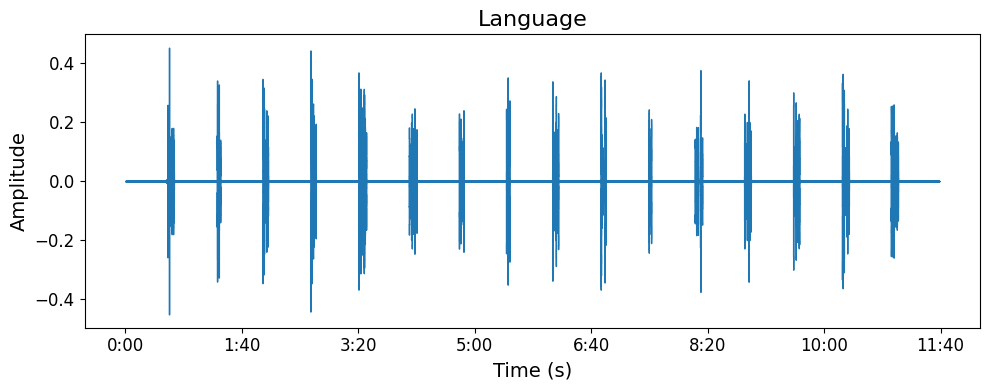

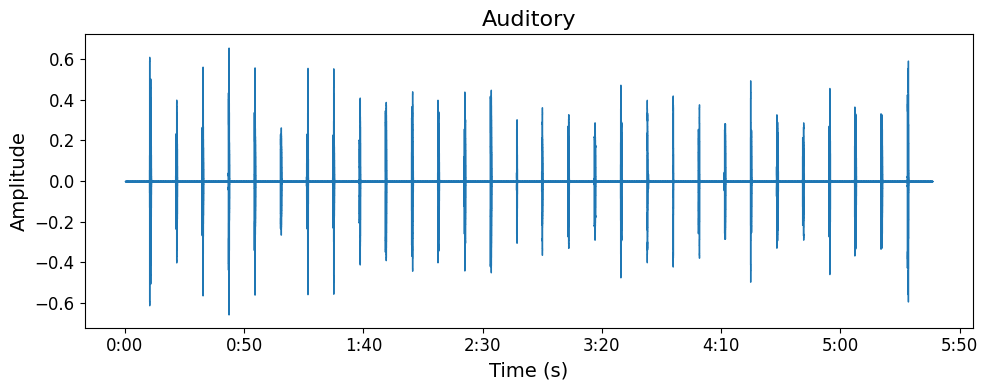

In [ ]:
# 언어+뇌신경장애, 청각+뇌신경장애 Waveform 시각화
import librosa.display
import matplotlib.pyplot as plt

def visualize_waveform(file_path, title):
    # Wave 파일 로드
    y, sr = librosa.load(file_path)

    # 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title, fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Amplitude", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # 그래프를 깔끔하게 배치
    plt.show()

# 두 Wave 파일 시각화
visualize_waveform("언어+뇌신경장애.wav", "Language")
visualize_waveform("청각+뇌신경장애.wav", "Auditory")

##### ❌ 원본 음성 파일을 Waveform으로 시각화 해보니 문제점들을 발견
- 원본 음성 데이터 파일은 약 30초 가량의 침묵후에 한 마디 발화 그리고 또 30초 가량 침묵 패턴이 반복
- 해당 이미지로는 정확한 학습이 불가능하다고 판단

##### 📌 문제 해결방법
- 파일마다 비발화 시간 (침묵 구간)을 탐색해서 그 부분을 기준으로 파일을 자르는 함수 생성
- 음성 파일을 이미지화 시켜서 Featrue를 추출하기에 적합한 Spectrogram을 사용하기로 결정

#### ✅ 데이터 전처리

##### 함수 정의

##### 💬 함수 정의
- 침묵 구간 탐색 함수
  - 오디오 데이터 슬라이스: 오디오 데이터를 일정 간격(seek_step)으로 슬라이스하고 각 슬라이스의 RMS 값을 계산하여 데시벨 임계값(silence_thresh) 이하인 슬라이스의 시작 위치를 찾아냄 -> RMS는 오디오 신호의 크기(음량)를 측정하는 데 사용
  - 침묵 시작 위치 탐색: 침묵으로 간주된 슬라이스의 시작 위치들을 리스트에 저장함
  - 연속된 침묵 구간 그룹화: 연속된 침묵 시작 위치들을 그룹화하여 각 침묵 구간의 시작과 끝 위치를 리스트로 반환함
- 발화 구간 탐색을 위한 함수 :
  - 침묵 구간 탐지: detect_silence 함수를 호출하여 오디오 데이터에서 침묵 구간을 찾아냄. 오디오의 길이를 확인하고 침묵 구간이 없으면 전체 오디오를 발화 구간으로 반환함.
  - 발화 구간 설정: 침묵 구간 리스트를 기반으로 발화 구간을 설정함. 침묵 구간 전후의 구간을 발화 구간으로 간주하여 nonsilent_ranges 리스트에 추가함.
  - 결과 반환: 발화 구간 리스트를 정리하여 반환함. 오디오의 마지막 부분이 침묵으로 끝나지 않으면 그 부분을 발화 구간으로 추가하고, 시작부터 침묵으로 시작하면 해당 구간을 제거함.
- 최종 발화 구간과 침묵 구간 분리하여 반환한 함수 :
  - create_json: 오디오 파일에서 발화와 침묵 구간을 탐지하여 각 구간을 JSON 형식으로 반환함
  - match_target_amplitude: 오디오 세그먼트의 음량을 목표 dBFS 값에 맞춰 조정함
  - split_on_silence: 침묵을 기준으로 오디오 세그먼트를 분리하고, 각 발화 구간을 일정 길이만큼 확장하여 반환함


In [ ]:
# 침묵 구간 탐색하기 함수 정의 (detect_silence)
def detect_silence(audio_segment, min_silence_len=1000, silence_thresh=-16, seek_step=1, silence_has_gap=True):
    seg_len = len(audio_segment)

    if seg_len < min_silence_len:
        return []

    silence_thresh = db_to_float(silence_thresh) * audio_segment.max_possible_amplitude

    silence_starts = []

    last_slice_start = seg_len - min_silence_len
    slice_starts = range(0, last_slice_start + 1, seek_step)

    if last_slice_start % seek_step:
        slice_starts = itertools.chain(slice_starts, [last_slice_start])

    for i in slice_starts:
        audio_slice = audio_segment[i:i + min_silence_len]
        if audio_slice.rms <= silence_thresh:
            silence_starts.append(i)

    if not silence_starts:
        return []

    silent_ranges = []

    prev_i = silence_starts.pop(0)
    current_range_start = prev_i

    for silence_start_i in silence_starts:
        continuous = (silence_start_i == prev_i + seek_step)

        if not continuous and silence_has_gap:
            silent_ranges.append([current_range_start,
                                  prev_i + min_silence_len])
            current_range_start = silence_start_i
        prev_i = silence_start_i

    silent_ranges.append([current_range_start,
                          prev_i + min_silence_len])

    return silent_ranges

In [ ]:
# 발화 구간 탐색을 위한 함수 정의 (detect_nonsilent)
def detect_nonsilent(audio_segment, min_silence_len=1000, silence_thresh=-16, seek_step=1):
    silent_ranges = detect_silence(audio_segment, min_silence_len, silence_thresh, seek_step)
    len_seg = len(audio_segment)

    if not silent_ranges:
        return [[0, len_seg]]

    if silent_ranges[0][0] == 0 and silent_ranges[0][1] == len_seg:
        return []

    prev_end_i = 0
    nonsilent_ranges = []
    for start_i, end_i in silent_ranges:
        nonsilent_ranges.append([prev_end_i, start_i])
        prev_end_i = end_i

    if end_i != len_seg:
        nonsilent_ranges.append([prev_end_i, len_seg])

    if nonsilent_ranges[0] == [0, 0]:
        nonsilent_ranges.pop(0)

    return nonsilent_ranges

In [ ]:
# 위 두 함수를 통해 원본 음성 데이터에서 최종 발화 구간과 침묵 구간 분리하여 반환
def create_json(audio_file):
  intervals_jsons = []

  min_silence_length = 70
  intervals = detect_nonsilent(audio_file,
                               min_silence_len=min_silence_length,
                               silence_thresh=-32.64)

  if intervals[0][0] != 0:
    intervals_jsons.append({'start':0,'end':intervals[0][0]/1000,'tag':'침묵'})

  non_silence_start = intervals[0][0]
  before_silence_start = intervals[0][1]

  for interval in intervals:
    interval_audio = audio_file[interval[0]:interval[1]]

    if (interval[0] - before_silence_start) >= 20000:
      intervals_jsons.append({'start':non_silence_start/1000,'end':(before_silence_start+200)/1000,'tag':'비침묵'})
      non_silence_start = interval[0]-200
      intervals_jsons.append({'start':before_silence_start/1000,'end':interval[0]/1000,'tag':'침묵'})
    before_silence_start = interval[1]

  if non_silence_start != len(audio_file):
    intervals_jsons.append({'start':non_silence_start/1000,'end':len(audio_file)/1000,'tag':'비침묵'})

  return intervals_jsons


#########################################################
def match_target_amplitude(sound, target_dBFS):
	change_in_dBFS = target_dBFS - sound.dBFS
	return sound.apply_gain(change_in_dBFS)


#########################################################
def split_on_silence(audio_segment, min_silence_len=1000, silence_thresh=-16, keep_silence=100,
                     seek_step=1):

    def pairwise(iterable):
        "s -> (s0,s1), (s1,s2), (s2, s3), ..."
        a, b = itertools.tee(iterable)
        next(b, None)
        return zip(a, b)

    if isinstance(keep_silence, bool):
        keep_silence = len(audio_segment) if keep_silence else 0

    output_ranges = [
        [ start - keep_silence, end + keep_silence ]
        for (start,end)
            in detect_nonsilent(audio_segment, min_silence_len, silence_thresh, seek_step)
    ]

    for range_i, range_ii in pairwise(output_ranges):
        last_end = range_i[1]
        next_start = range_ii[0]
        if next_start < last_end:
            range_i[1] = (last_end+next_start)//2
            range_ii[0] = range_i[1]

    return [
        audio_segment[ max(start,0) : min(end,len(audio_segment)) ]
        for start,end in output_ranges
    ]

In [ ]:
# 전처리 후 파일을 저장하기 위한 wav, txt파일 생성
PATH = os.getcwd()

LABEL = os.path.join(PATH, label_folder)
AUDIO = os.path.join(PATH, wav_folder)

LABEL_language = os.path.join(PATH, label_folder_language)
AUDIO_language = os.path.join(PATH, wav_folder_language)

LABEL_listen = os.path.join(PATH, label_folder_listen)
AUDIO_listen = os.path.join(PATH, wav_folder_listen)

# 결과 폴더 생성
OUTPUT = os.path.join(PATH, result_folder)
OUTPUT_language = os.path.join(PATH, result_folder_language)
OUTPUT_listen = os.path.join(PATH, result_folder_listen)

OUTPUT_language_spec = os.path.join(OUTPUT_language, "spectrogram")
OUTPUT_listen_spec = os.path.join(OUTPUT_listen, "spectrogram")

In [ ]:
OUTPUT_language_spec

'/content/gdrive/My Drive/data/결과/언어+뇌신경장애/spectrogram'

In [ ]:
# 폴더 안에 원본 파일이 총 몇개 있는지 확인

print("라벨 폴더 폴더 개수: ", len(os.listdir(LABEL)))
print("음성 폴더 폴더 개수: ", len(os.listdir(AUDIO)))
print()
print("언어+뇌신경장애 라벨 폴더 파일 개수: ", len(os.listdir(LABEL_language)))
print("언어+뇌신경장애 음성 폴더 파일 개수: ", len(os.listdir(AUDIO_language)))
print()
print("청각+뇌신경장애 라벨 폴더 파일 개수: ", len(os.listdir(LABEL_listen)))
print("청각+뇌신경장애 음성 폴더 파일 개수: ", len(os.listdir(AUDIO_listen)))

라벨 폴더 폴더 개수:  2
음성 폴더 폴더 개수:  2

언어+뇌신경장애 라벨 폴더 파일 개수:  159
언어+뇌신경장애 음성 폴더 파일 개수:  160

청각+뇌신경장애 라벨 폴더 파일 개수:  263
청각+뇌신경장애 음성 폴더 파일 개수:  263


##### 💬 위에서 정의한 함수를 이용하여 발화 구간만 자른 후 음성파일과 대본파일 생성

In [ ]:
import os
import pandas as pd
from pydub import AudioSegment
from pydub.utils import make_chunks, mediainfo
from scipy.io.wavfile import write

# 결과 폴더
for folder in [OUTPUT, OUTPUT_language, OUTPUT_listen]:
    os.makedirs(folder, exist_ok=True)

# 라벨 및 오디오 폴더 설정 및 처리
for folder_type, RESULT_FOLDER in [("language", OUTPUT_language), ("listen", OUTPUT_listen)]:
    if folder_type == "language":
        LABEL_FOLDER = LABEL_language
        AUDIO_FOLDER = AUDIO_language
    elif folder_type == "listen":
        LABEL_FOLDER = LABEL_listen
        AUDIO_FOLDER = AUDIO_listen

    # 라벨 파일과 오디오 파일 리스트
    label_files = sorted(os.listdir(LABEL_FOLDER))
    audio_files = sorted(os.listdir(AUDIO_FOLDER))

    # 공통된 파일 개수만 처리
    num_files = min(len(label_files), len(audio_files))

    for i in range(num_files):
        # 스크립트 로드 (메타데이터, DataFrame)
        print(f'파일: {i}')
        label_file_path = os.path.join(LABEL_FOLDER, label_files[i])
        meta = pd.read_json(label_file_path, orient='columns')
        sampling_rate = meta['Meta_info']['SamplingRate']
        meta = pd.DataFrame(meta['Transcript'][0].split("."))[:-1]

        # 오디오 로드
        audio_file_path = os.path.join(AUDIO_FOLDER, audio_files[i])

        # 침묵 및 비침묵 분리
        sound = AudioSegment.from_file(audio_file_path, "wav")
        normalized_sound = match_target_amplitude(sound, -20.0)
        json_data = create_json(normalized_sound)

        # 음성/텍스트 세그먼트 로드 (DataFrame)
        audio_df = pd.DataFrame(json_data)
        df = pd.concat([audio_df[audio_df['tag'] == '비침묵'].reset_index(drop=True).drop('tag', axis=1), meta], axis=1)
        df.columns = ['start', 'end', 'text']

        # 세그먼트용 오디오 로드
        audio = AudioSegment.from_file(audio_file_path)

        # 문장별 데이터 저장 -> Nan 값은 제외 (중간 중간에 "안녕하세요 Nan"과 같은 파일이 존재)
        df_without_nan = df.dropna()

        for j, row in df_without_nan.iterrows():
            start_time_sec = row['start']  # 시작 시간(초 단위)
            end_time_sec = row['end']  # 종료 시간(초 단위)

            # 시작 시간과 종료 시간을 밀리초 단위로 변환
            start_time_ms = start_time_sec * 1000
            end_time_ms = (end_time_sec + 1.5) * 1000

            # 오디오 세그먼트 추출
            output = audio[int(start_time_ms):int(end_time_ms)]

            # 세그먼트 길이 확인
            clip_length = len(output) / 1000  # 밀리초에서 초로 변환
            if clip_length > 12:
                continue  # 12초를 초과하는 세그먼트는 저장하지 않음

            # 세그먼트 오디오 파일 저장
            output.export(os.path.join(RESULT_FOLDER, f"output_{folder_type}{i}_{j}.wav"), format="wav")

            # 텍스트 파일 저장
            text = row['text']
            with open(os.path.join(RESULT_FOLDER, f"output_{folder_type}{i}_{j}.txt"), 'w') as f:
                f.write(text)
                f.write("\n")
                f.write(str(sampling_rate))

# 결과 확인
print("언어 결과 파일:", os.listdir(OUTPUT_language))
print("청각 결과 파일:", os.listdir(OUTPUT_listen))

파일: 0
파일: 1
파일: 2
파일: 3
파일: 4
파일: 5
파일: 6
파일: 7
파일: 8
파일: 9
파일: 10
파일: 11
파일: 12
파일: 13
파일: 14
파일: 15
파일: 16
파일: 17
파일: 18
파일: 19
파일: 20
파일: 21
파일: 22
파일: 23
파일: 24
파일: 25
파일: 26
파일: 27
파일: 28
파일: 29
파일: 30
파일: 31
파일: 32
파일: 33
파일: 34
파일: 35
파일: 36
파일: 37
파일: 38
파일: 39
파일: 40
파일: 41
파일: 42
파일: 43
파일: 44
파일: 45
파일: 46
파일: 47
파일: 48
파일: 49
파일: 50
파일: 51
파일: 52
파일: 53
파일: 54
파일: 55
파일: 56
파일: 57
파일: 58
파일: 59
파일: 60
파일: 61
파일: 62
파일: 63
파일: 64
파일: 65
파일: 66
파일: 67
파일: 68
파일: 69
파일: 70
파일: 71
파일: 72
파일: 73
파일: 74
파일: 75
파일: 76
파일: 77
파일: 78
파일: 79
파일: 80
파일: 81
파일: 82
파일: 83
파일: 84
파일: 85
파일: 86
파일: 87
파일: 88
파일: 89
파일: 90
파일: 91
파일: 92
파일: 93
파일: 94
파일: 95
파일: 96
파일: 97
파일: 98
파일: 99
파일: 100
파일: 101
파일: 102
파일: 103
파일: 104
파일: 105
파일: 106
파일: 107
파일: 108
파일: 109
파일: 110
파일: 111
파일: 112
파일: 113
파일: 114
파일: 115
파일: 116
파일: 117
파일: 118
파일: 119
파일: 120
파일: 121
파일: 122
파일: 123
파일: 124
파일: 125
파일: 126
파일: 127
파일: 128
파일: 129
파일: 130
파일: 131
파일: 132
파일: 133
파일: 134
파일: 135
파일: 136
파일: 137
파일: 13

##### 💬 생성된 음성 파일과 대본 파일 시각화하여 파악

In [ ]:
# 대본 파일 확인

file_paths = ["output_listen3_2.txt", "output_language0_0.txt"]

data = []
index_names = ["청각+뇌신경장애", "언어+뇌신경장애"]
for file_path, name in zip(file_paths, index_names):
    with open(file_path, 'r', encoding='utf-8') as f:
        transcript = f.read().strip().split("\n")[0]  # 텍스트 파일 읽기 및 줄바꿈 이후의 내용 제외
        data.append(transcript)

df = pd.DataFrame(data, columns=["전처리 후 대본 example"], index=index_names)

df

,전처리 후 대본 example
청각+뇌신경장애,가방에 사탕과 연필을 넣을 거예요
언어+뇌신경장애,나는 바지를 입고 단추를 채웁니다


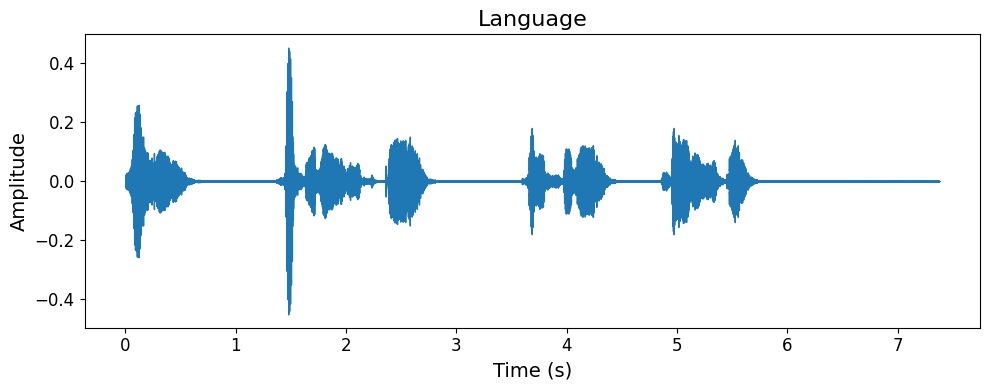

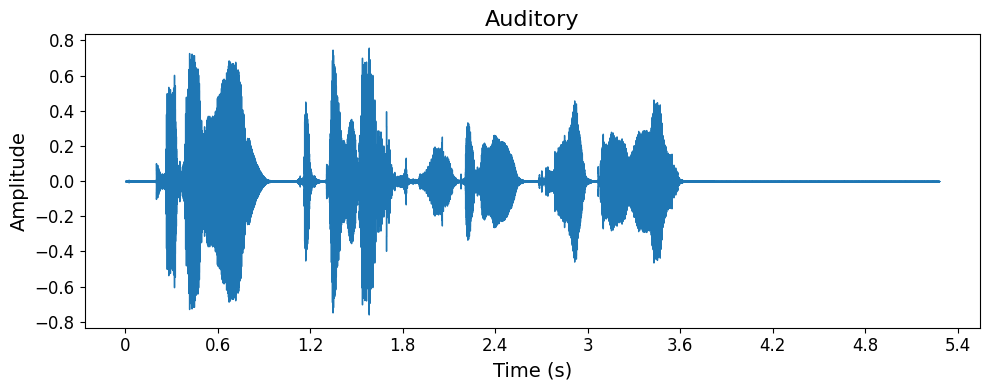

In [ ]:
# 언어+뇌신경장애, 청각+뇌신경장애 전처리 후의 Waveform 시각화
import librosa.display
import matplotlib.pyplot as plt

def visualize_waveform(file_path, title):
    # Wave 파일 로드
    y, sr = librosa.load(file_path)

    # 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title, fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Amplitude", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # 그래프를 깔끔하게 배치
    plt.show()

# 두 Wave 파일 시각화
visualize_waveform("output_language0_0.wav", "Language")
visualize_waveform("output_listen3_2.wav", "Auditory")

##### 💬 음성 파일을 비발화 구간없이 잘라내었으니 Spectrogram을 사용하여 이미지화 시킬 예정
- 이로 인해 음성에 들어있는 정보들을 수학적인 신호 처리를 거쳐 추출 가능
- 그렇다면, 여러가지 Spectrogram 중에 어떤 것을 사용할 것인지 결정해야 함

#### 💡 Log-mel Spectrogram 사용
- 사람의 청각은 저주파에서 민감하고 고주파로 갈 수록 주파수 차이를 둔감하게 느낌
- Log Mel-Spectrogram은 음성 데이터를 주파수-시간 도메인으로 변환할 수 있음
- 음성 데이터에 STFT(Short Time Fourier Transform)을 적용하고 이를 Mel Filter Bank에 통과시켜 청각 특성을 반영한 이미지 데이터를 생성

##### ✅ 이미지
- Log Mel-Spectrogram을 이미지 데이터로 변환하고, 이를 정사각형으로 잘라내는 과정
- 세로 픽셀이 128개이므로 가로 픽셀도 128개로 분할하였으며, 이는 1.28초(가로 1 픽셀은 20ms, 10ms씩 겹쳐서 STFT)에 해당
- 겹치는 길이는 선행 연구[1][2]에서 25%~60% 정도의 값을 사용한 것을 참고하여 50% 정도로 설정
- 잘라내고 마지막에 짧은 부분이 남았을 경우, 0으로 패딩

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

# 로그 멜 스펙트로그램 생성 함수
def compute_log_mel_spectrogram(signal, sample_rate, n_mels=128):
    frame_length = int(0.02 * sample_rate)  # 20ms를 샘플링레이트로 변환
    hop_length = int(frame_length / 2)      # 겹치는 부분
    stft = librosa.stft(signal, n_fft=frame_length, hop_length=hop_length)
    mel_spec = librosa.feature.melspectrogram(S=np.abs(stft)**2, sr=sample_rate, n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec


def pad_to_square(spectrogram, target_size=128, padding_value=-80):
    if spectrogram.shape[1] < target_size:
        pad_width = target_size - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant', constant_values=padding_value)
    return spectrogram

def split_and_save_spectrogram(log_mel_spec, base_filename, target_size=128, output_folder='./', sampling_rate=48000):
    """Splits a spectrogram into smaller square segments and saves each segment as an image file."""
    # Ensure the input spectrogram height matches the target size
    assert log_mel_spec.shape[0] == target_size, f"Spectrogram height should be {target_size}"

    num_segments_x = log_mel_spec.shape[1] // target_size

    for j in range(num_segments_x + 1):
        segment = log_mel_spec[:, j*target_size:(j+1)*target_size]
        if segment.shape[1] < target_size:
            segment = pad_to_square(segment, target_size)
        #print(segment.shape)
        segment_filename = os.path.join(output_folder, f"{base_filename}_{j}.png")
        save_spectrogram(segment, segment_filename)


# 스펙트로그램 저장 함수
def save_spectrogram(spectrogram, filename, sampling_rate=48000):
    plt.figure(figsize=(1.28, 1.28))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)  # 여백 조정
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sampling_rate, cmap='gray')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close()

# 데이터프레임 생성을 위한 리스트 초기화
data = []

def process_wav_files(folder_path, label, output_folder, target_size=128):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder_path, file_name)
            txt_path = file_path.replace('.wav', '.txt')

            if not os.path.exists(txt_path):
                print(f"Warning: {txt_path} does not exist.")
                continue

            with open(txt_path, 'r') as f:
                lines = f.readlines()
                sample_rate = int(lines[1].strip())

            signal, sr = librosa.load(file_path, sr=sample_rate)
            signal, _ = librosa.effects.trim(signal, top_db=60, frame_length=int(0.02*sample_rate), hop_length=int(0.02*sample_rate))
            log_mel_spec = compute_log_mel_spectrogram(signal, sr)
            base_filename = os.path.splitext(file_name)[0]
            split_and_save_spectrogram(log_mel_spec, base_filename, target_size, output_folder, sampling_rate=sr)
            data.append({'file_name': file_name, 'log_mel_spec': log_mel_spec, 'label': label})

##### 💬 생성 된 Log-mel Spectrogram 이미지 파일 확인

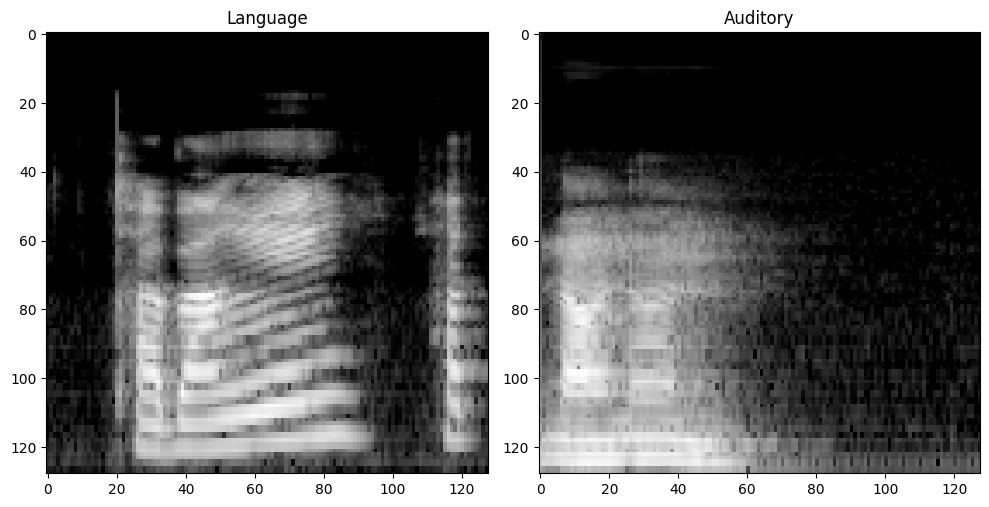

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로와 이름
image_paths = {
    "Language": "output_listen3_2_0.png",
    "Auditory": "output_language0_0_0.png"
}

# 이미지 표시
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for ax, (name, path) in zip(axes, image_paths.items()):
    img = Image.open(path)
    ax.imshow(img)
    ax.set_title(name)

plt.tight_layout()
plt.show()

In [ ]:
OUTPUT_language_spec

'/content/gdrive/My Drive/data/결과/언어+뇌신경장애/spectrogram'

In [ ]:
# 폴더 내의 WAV 파일 처리
process_wav_files(OUTPUT_language, 0, OUTPUT_language_spec)

In [ ]:
process_wav_files(OUTPUT_listen, 1, OUTPUT_listen_spec)

In [ ]:
# log-mel sprectrogram 사용
data[0]['log_mel_spec']

array([[-70.21176 , -57.38217 , -57.747757, ..., -30.270006, -75.708534,
        -80.      ],
       [-68.80576 , -55.97618 , -56.341766, ..., -28.864016, -74.30254 ,
        -80.      ],
       [-65.73843 , -74.95391 , -59.731606, ..., -36.207966, -72.68266 ,
        -80.      ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

### 📌 5. Evaluation

#### ✅ 정확도(Accuracy)
- 모델이 전체 샘플 중에서 정확히 예측한 샘플의 비율을 나타내는 평가지표. 즉, 모델이 얼마나 정확하게 예측하는지를 나타내는 값.

<img src="https://drive.google.com/uc?id=11SgWn12bNzn08ysh1aD3HVdOHm9gHBNq" height="70" width="300">

#### ✅재현율(Recall)
- 분류 모델의 성능을 평가하기 위한 지표 중 하나로, 실제로 양성인 샘플 중에서 모델이 양성으로 정확히 예측한 샘플의 비율을 의미.

<img src="https://drive.google.com/uc?id=15im3D1wxIwK2N9wBROYPU2UqqfivX5xz" height="70" width="300">

#### ✅정밀도(Precision)
- 분류 모델의 성능을 평가하기 위한 지표 중 하나로, 모델이 양성으로 예측한 샘플 중에서 실제로 양성인 샘플의 비율을 나타냄.

<img src="https://drive.google.com/uc?id=1D6TsWG6GmhciF6wFOS73ZFPXHJALHJoO" height="70" width="300">

#### ✅F1 Score
- 이 두 가지의 지표의 조화평균을 구한 것으로, 조화평균을 사용하는 이유는 두 metric중 더 작은 값에 영향을 많이 받기 위함. F1Score는 0.0~1.0 사이의 값을 가지는데, Precision과 Recall 값이 모두 갖춰져야만 높은 지표를 얻을 수 있음.

<img src="https://drive.google.com/uc?id=1FDfm0qhR9dnSNs8fMD-9X-5r7XpkCcON" height="70" width="500">

#### ✅ Calibration
- 모형의 출력 값이 실제 confidence를 반영하도록 만드는 것. 즉, 예측 모델의 출력 확률이 실제로 발생할 확률과 일치하도록 조정하는 과정.

#### 💬 의료 Task에서의 이용
- 의학적 진단에서는 딥러닝을 전적으로 신뢰해서 모든 판단을 딥러닝에 맡기는 식으로 의사결정이 이루어지기 힘듦.
- 딥러닝 모델의 confidence가 낮은 경우에만 사람이 보는 방식, 또는 false negative 가 치명적인 경우에는 confidence가 낮은 것만 사람이 재확인하는 방식으로 비용 축소 가능.
- 이러한 의사 결정이 가능하기 위해서는 모형의 confidence 를 보는 것이 필요하고 이 confidence가 calibrated confidence 여야지 그 값에 신뢰성이 있다고 할 수 있음.
- 보정된 모델을 통해서 불필요한 검사나 치료를 줄여 의료 비용을 절감 가능.

#### 💡의료 Task에서의 활용 사례
- Liang, Gongbo, et al. "Improved trainable calibration method for neural networks on medical imaging classification." arXiv preprint arXiv:2009.04057 (2020).
- " Empirically, neural networks are often miscalibrated and overconfident in their predictions. This miscalibration could be problematic
in any automatic decision-making system, but we focus on the medical field in which
neural network miscalibration has the potential to lead to significant treatment errors."

<img src="https://drive.google.com/uc?id=1Qen93qkGDt1MF76WfpvaReIw3wFv0By5" height="350" width="1000">

#### ✅Expected Calibration Error (ECE)
- confidence와 실제 accuracy 의 차이의 기댓값. 모델이 신뢰성 있는 확률 예측을 제공하는지를 평가하는 데 유용함. ECE 값이 작을수록 모델의 예측이 실제 결과와 더 잘 맞아떨어지며, 이는 모델이 잘 보정되었음을 의미함.

<img src="https://drive.google.com/uc?id=15Kafhbx__gABR8-JttsGajZ0ixGtOj1B" height="70" width="500">

#### ✅Overconfidence Error (OE)
- 모델의 과신 정도를 측정하는 지표. 이는 모델이 실제로는 정확하지 않은데도 높은 확률로 예측할 때 발생하는 오차를 평가. 특히, 분류 문제에서 모델의 예측 확률이 실제 정확도보다 높을 때 모델이 얼마나 과신하고 있는지를 나타냄.

<img src="https://drive.google.com/uc?id=1OdokeBdLc3FIwPb6r257cw74t-f8U2Bv" height="70" width="500">

In [ ]:
# ECE, OE 함수 정의

import numpy as np
def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            ece += np.abs(bin_accuracy - bin_confidence) * bin_size / len(y_true)
    return ece

def calculate_oe(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    oe = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            if bin_confidence > bin_accuracy:
                oe += (bin_confidence - bin_accuracy) * bin_size / len(y_true)
    return oe

### 📌 6. Modeling

#### 💬 전체 실험 과정
1. 비교대상 실험

2. 정확도 향상과 Calibration 문제를 해결하기 위한 제안하는 방법들 Trial 1-5까지 진행

3. Trial 5개 중 가장 좋은 성능을 가진 모델 선정

4. 모델 경량화를 위한 KD 과정: 선정한 모델을 Techer 모델, Baseline1과 동일한 구조의 모델을 Student 모델로 구성

5. KD 실험: T 값을 변경해가며 최적의 T 값 선정

#### 💬 기본적인 세팅 및 하이퍼파라미터 세팅
- baseline과 적절한 비교를 위해, 참고한 논문의 세팅을 동일하게 설정함, 명시되어있지 않은 부분에 대해서 임의로 설정했고, 모든 실험에서 동일하게 설정하고 진행
- 정확한 비교를 위해 각 trial별로 별도의 하이퍼파라미터 튜닝을 진행하지 않고 동일한 세팅으로 진행

#### 💬 공통 세팅
1. Batch_size = 32, img_height = 28, img_width = 28

2. Train:Validation:Test = 3:1:1

3. Loss Function : Cross-Entropy

4. optimizer:Adam

5. learning rate scheduler: ReduceLROnPlateau

6. early stopping : patience=15

#### 💡 실험 결과의 랜덤성 문제 해결
- 모든 실험에서 각 모델 및 trial 별로 10회씩 반복실험을 진행하였고, 결과를 평균, 표준편차로 표현함. ➡️ 한번 실험하였을 때는 우연에 의한 결과일 가능성이 있어 실험 결과를 더욱 공고히 하기 위함임.

## ✅ baseline1의 모델 구조와 하이퍼파라미터
#### 💡 <b>참조논문</b>
##### 하창진 and 고태식. "한국인 구음장애 환자의 발화 데이터 기반 질병 예측을 위한 모바일 애플리케이션 개발" 의공학회지 45, no.1 (2024) : 1-9.
- 본 연구에서는 얻은 log-mel spectrogram을 바탕으로 구축한 딥러닝 모
델은 CNN 구조를 채택하였음.
- 입력으로는 (28×28) 형태의 logmel spectrogram을 사용하고, 3개의 convolutional layers를 거쳐 flatten하여 (15×12) 크기의 특성을 추출함.
- 이후 4개의 완전 연결층을 거쳐 각 클래스로의 예측을 수행하며, 소프트맥스 함수
를 사용하여 각 클래스별 확률을 계산함.

<img src="https://drive.google.com/uc?id=1TMwt1S5Ff14QbcE7iTuLKgEIl_4KTq4Q">
</br>

##### <b>모델 구조와 하이퍼파라미터 설명</b>

##### <b>모델 구조</b>

1. **Input Layer**
   - **Shape**: `(28, 28, 3)`
   - 설명: 입력 이미지는 28x28 크기의 RGB 이미지입니다.

2. **첫 번째 Convolutional Layer**
   - **Conv2D**: 8개의 필터, 필터 크기 `(3, 3)`, 'same' 패딩, ReLU 활성화 함수
   - **BatchNormalization**: 배치 정규화를 통해 학습 속도를 높이고 불안정성을 줄입니다.
   - **AveragePooling2D**: 풀링 크기 `(2, 2)`을 사용하여 입력의 공간 차원을 절반으로 줄입니다.

3. **두 번째 Convolutional Layer**
   - **Conv2D**: 16개의 필터, 필터 크기 `(3, 3)`, 'same' 패딩, ReLU 활성화 함수
   - **BatchNormalization**
   - **AveragePooling2D**: 풀링 크기 `(2, 2)`

4. **세 번째 Convolutional Layer**
   - **Conv2D**: 32개의 필터, 필터 크기 `(3, 3)`, 'same' 패딩, ReLU 활성화 함수
   - **BatchNormalization**
   - **AveragePooling2D**: 풀링 크기 `(2, 2)`

5. **Flatten Layer**
   - 설명: 3차원 텐서를 1차원으로 변환하여 완전 연결 레이어에 입력할 수 있도록 합니다.

6. **Fully Connected Layers**
   - **Dense (512 units, ReLU activation)**
   - **Dense (512 units, ReLU activation)**
   - **Dense (128 units, ReLU activation)**
   - **Dense (2 units, Softmax activation)**: 최종 출력 레이어로, 2개의 클래스에 대한 확률 분포를 출력합니다.

#### 하이퍼파라미터

1. **Optimizer**
   - **Adam**: 적응형 학습률을 사용하는 Adam 옵티마이저를 사용합니다.
   
2. **Loss Function**
   - **Categorical Crossentropy**: 다중 클래스 분류 문제에서 사용되는 손실 함수입니다.

3. **Metrics**
   - **Accuracy**: 모델의 정확도를 측정하는 메트릭입니다.

4. **Callbacks**
   - **ModelCheckpoint**: `val_loss`가 가장 낮은 모델을 저장합니다.
   - **ReduceLROnPlateau**: `val_loss`가 개선되지 않을 때 학습률을 10분의 1로 줄입니다. `patience=10`으로 설정하여 10번의 에포크 동안 개선되지 않으면 학습률을 조정합니다. 최소 학습률은 `0.00001`입니다.
   - **EarlyStopping**: `val_loss`가 `15`번의 에포크 동안 개선되지 않으면 학습을 중지하고 최상의 가중치를 복원합니다.

이 모델은 작은 이미지 데이터를 다루기 위해 설계되었으며, 간단한 CNN 구조를 가지고 있습니다. 이를 통해 이미지 분류 문제를 해결하는 데 적합합니다. 각 층에서 필터 수를 증가시키고, 풀링을 통해 특성 맵의 크기를 줄여서 효율적인 학습을 도모합니다. 배치 정규화를 통해 학습의 안정성을 높이고, 학습률 감소 및 조기 중지를 통해 최적의 학습을 목표로 합니다.


## ✅ baseline2
#### 💡 <b>참고</b>
- AI Hub 구음장애 음성인식 데이터 및 모델 : https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=data&dataSetSn=608

</br>

##### <b>모델 구조와 하이퍼파라미터 설명</b>

##### <b>모델 구조</b>

1. **Pretrained Autoencoder 모델**
   - **모델 경로**: `./pretrained_model/ae_model.h5`
   - 설명: 특징 벡터를 추출하기 위해 사전 학습된 오토인코더 모델을 사용합니다.

2. **MLP 모델**
   - **Dense (512 units, ReLU activation)**
     - **Dropout (0.1)**
   - **Dense (512 units, ReLU activation)**
     - **Dropout (0.1)**
   - **Dense (128 units, ReLU activation)**
     - **Dropout (0.1)**
   - **Dense (N units, Softmax activation)**
     - 설명: `N`은 클래스 수로, 최종 출력 레이어에서 각 클래스에 대한 확률 분포를 출력합니다.

#### 💬 하이퍼파라미터

**위와 동일**


- 이 모델은 사전 학습된 오토인코더를 사용하여 특징 벡터를 추출하고, 이 특징 벡터를 입력으로 다층 퍼셉트론(MLP)을 사용하여 이미지 분류 문제를 해결하는 구조입니다. 드롭아웃 레이어를 추가하여 과적합을 방지하며, 학습률 감소와 조기 중지를 통해 최적의 학습을 목표로 합니다.

## ✅ 데이터 로드 후 train, valid, test 분리

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)

# 클래스 비율 확인
class_names = dataset.class_names
print(f"Class names: {class_names}")

class_counts = np.zeros(len(class_names))
for _, labels in dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

print(f"Class distribution: {class_counts}")

2024-06-05 21:35:40.716867: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Found 8135 files belonging to 2 classes.


2024-06-05 21:35:41.403406: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-06-05 21:35:41.423138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-05 21:35:41.423208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2024-06-05 21:35:41.423215: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-06-05 21:35:41.424490: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-05 21:35:41.424510: I tensorflow/stream_executor/pl

Class names: ['언어+뇌신경장애', '청각+뇌신경장애']
Class distribution: [1572. 6563.]


In [ ]:
# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=random_seed)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# 각 데이터셋의 클래스 비율 확인
def get_class_distribution(labels):
    class_counts = np.sum(labels, axis=0)
    return class_counts

print(f"Train class distribution: {get_class_distribution(train_labels)}")
print(f"Validation class distribution: {get_class_distribution(val_labels)}")
print(f"Test class distribution: {get_class_distribution(test_labels)}")


Train class distribution: [ 943. 3938.]
Validation class distribution: [ 315. 1312.]
Test class distribution: [ 314. 1313.]


## ✅ Baseline1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 체크포인트 경로 확인 및 생성
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# 모델 정의 함수
def create_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 결과 저장용 리스트
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")
    model = create_model()

    checkpoint_path_baseline1 = os.path.join(checkpoint_dir, f"best_model_baseline1_{i+1}.h5")
    checkpoint_baseline1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_baseline1, monitor='val_loss', save_best_only=True, mode='min')

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[checkpoint_baseline1, reduce_lr, early_stopping],
        verbose=1
    )

    histories.append(history)

    model.load_weights(checkpoint_path_baseline1)

    loss, accuracy = model.evaluate(test_dataset)
    accuracies.append(accuracy)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

    accuracies.append(report['accuracy'])
    recalls.append(report['weighted avg']['recall'])
    precisions.append(report['weighted avg']['precision'])
    f1_scores.append(report['weighted avg']['f1-score'])

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)


Experiment 1/10
Epoch 1/100


2024-06-05 21:35:43.653857: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-06-05 21:35:43.938534: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-06-05 21:35:44.308397: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 29/153 [====>.........................] - ETA: 0s - loss: 0.5095 - accuracy: 0.8060  

2024-06-05 21:35:44.532618: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-06-05 21:35:44.561344: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


153/153 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.8277 - val_loss: 0.4643 - val_accuracy: 0.8162
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8568 - val_loss: 0.3705 - val_accuracy: 0.8549
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8756 - val_loss: 0.3198 - val_accuracy: 0.8734
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9021 - val_loss: 0.3320 - val_accuracy: 0.8746
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9195 - val_loss: 0.3323 - val_accuracy: 0.8691
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9275 - val_loss: 0.4275 - val_accuracy: 0.8654
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9359 - val_loss: 0.3673 - val_accuracy: 0.8642
Epoch 8/100

In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9103 ± 0.01
Recall: 0.9103 ± 0.01
Precision: 0.9080 ± 0.01
F1-score: 0.9045 ± 0.02
ECE: 0.0414 ± 0.00
OE: 0.0400 ± 0.00


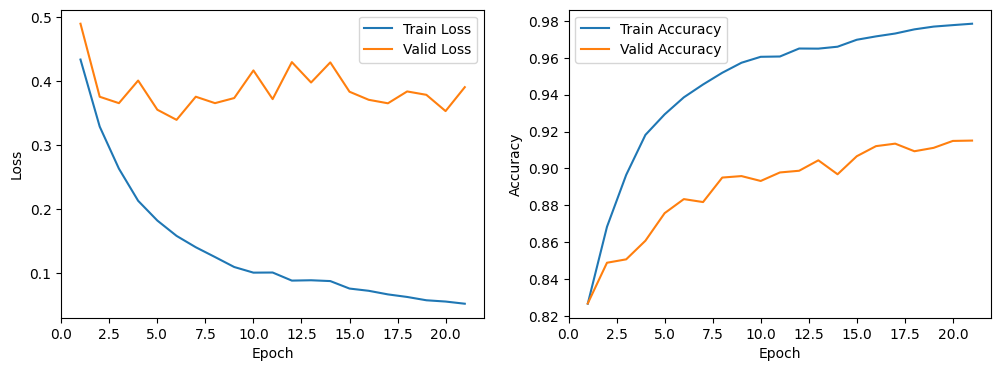

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history in histories)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## ✅ Baseline2

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# Pretrained 모델 로드
ae_model = tf.keras.models.load_model('./pretrained_model/ae_model.h5')
mlp_model_template = tf.keras.models.load_model('./pretrained_model/Speech_classification.h5')

# 특징 벡터 추출
train_features = ae_model.predict(train_images)
val_features = ae_model.predict(val_images)
test_features = ae_model.predict(test_images)

# 레이블을 인코딩 (필요한 경우)
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

# 특징 벡터를 사용한 데이터셋 생성
batch_size = 32  # 배치 크기 설정
train_dataset_new = tf.data.Dataset.from_tensor_slices((train_features, train_labels)).batch(batch_size)
val_dataset_new = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).batch(batch_size)
test_dataset_new = tf.data.Dataset.from_tensor_slices((test_features, test_labels)).batch(batch_size)

# 반복 실험 결과 저장 리스트
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    # MLP 모델 정의 및 드롭아웃 추가
    mlp_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(train_features.shape[1],)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

    # 모델 컴파일
    mlp_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # 체크포인트 설정
    checkpoint_path_baseline2 = os.path.join(checkpoint_dir, f"best_model_baseline2_{i+1}.h5")
    checkpoint_baseline2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_baseline2, monitor='val_loss', save_best_only=True, mode='min')

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # 모델 학습
    history = mlp_model.fit(
        train_dataset_new,
        validation_data=val_dataset_new,
        epochs=100,
        callbacks=[checkpoint_baseline2, reduce_lr, early_stopping],
        verbose=1
    )

    histories.append(history)

    mlp_model.load_weights(checkpoint_path_baseline2)

    # 모델 평가
    loss, accuracy = mlp_model.evaluate(test_dataset_new)

    accuracies.append(accuracy)

    # 테스트 데이터에 대한 예측 수행
    y_true = np.concatenate([y for x, y in test_dataset_new], axis=0)
    y_pred = mlp_model.predict(test_dataset_new)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 분류 보고서 생성
    report_mlp = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

    recalls.append(report_mlp['weighted avg']['recall'])
    precisions.append(report_mlp['weighted avg']['precision'])
    f1_scores.append(report_mlp['weighted avg']['f1-score'])

    ece = calculate_ece(y_true, y_pred)
    oe = calculate_oe(y_true, y_pred)

    ece_values.append(ece)
    oe_values.append(oe)


Experiment 1/10
Epoch 1/100
153/153 [==============================] - 0s 1ms/step - loss: 0.8297 - accuracy: 0.7726 - val_loss: 0.4961 - val_accuracy: 0.8101
Epoch 2/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.8070 - val_loss: 0.4407 - val_accuracy: 0.8230
Epoch 3/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8242 - val_loss: 0.4283 - val_accuracy: 0.8119
Epoch 4/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8300 - val_loss: 0.4227 - val_accuracy: 0.8205
Epoch 5/100
153/153 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8330 - val_loss: 0.4138 - val_accuracy: 0.8236
Epoch 6/100
153/153 [==============================] - 0s 975us/step - loss: 0.3751 - accuracy: 0.8441 - val_loss: 0.4044 - val_accuracy: 0.8230
Epoch 7/100
153/153 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8506 - val_loss: 0.4042 - va

In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.8541 ± 0.00
Recall: 0.8541 ± 0.00
Precision: 0.8434 ± 0.00
F1-score: 0.8441 ± 0.01
ECE: 0.0286 ± 0.01
OE: 0.0178 ± 0.00


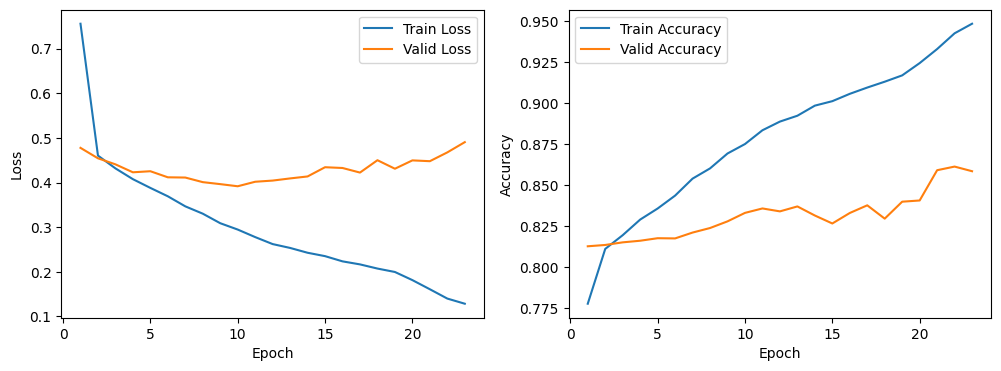

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history in histories)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#### 📌 비교대상들의 결과

**Baseline1**
- **Accuracy**: 0.9103 ± 0.01
- **Recall**: 0.9103 ± 0.01
- **Precision**: 0.9080 ± 0.01
- **F1-score**: 0.9045 ± 0.02
- **ECE**: 0.0414 ± 0.00
- **OE**: 0.0400 ± 0.00

**Baseline2**
- **Accuracy**: 0.8541 ± 0.00
- **Recall**: 0.8541 ± 0.00
- **Precision**: 0.8434 ± 0.00
- **F1-score**: 0.8441 ± 0.01
- **ECE**: 0.0286 ± 0.01
- **OE**: 0.0178 ± 0.00

> **Baseline2가 더 고급 모델인데 낮게 나온 이유**: 기존의 AI hub 사이트에 명시된 전처리 방법을 사용하지 않았기 때문에 해당 방법에 pretrain된 모델이 우리의 전처리된 데이터에 적합하지 않다고 해석할 수 있음.

**Baseline1이 더 좋은 성능이 나왔기에 주요 비교대상으로 삼기로 함!**



</br>

## ✅ Baseline1 보다 더 향상된 모델을 얻기 위한 Trial1-5 진행

#### ✅ <b>Trial1</b>
#### 💬 앙상블 기법 : 여러 개의 모델을 결합하여 단일 모델에 비하여 더 나은 예측 성능을 얻는 기법.

#### 💬 앙상블 기법의 원리
다양성 : 다양한 구조와 학습 방식을 가진 모델들이 다양한 데이터 패턴을 학습하고, 서로 다른 예측 오류를 상쇄함.
- 독립성 : 개별 모델이 서로 독립적으로 작동하여, 특정 모델의 오류가 전체 예측에 미치는 영향을 최소화함.
- 강건성 : 여러 모델을 결합함으로써 데이터 노이즈나 이상치에 대한 민감도를 줄이고, 예측의 안정성을 높일 수 있음.

#### 💬 모델별 특성
- Baseline Model : 기본적인 CNN 구조로, 단순한 패턴을 학습하여 기본적인 예측 성능을 제공함.
- VGG Model : 깊은 네트워크 구조로 고해상도 특징을 학습하여, 복잡한 패턴 인식을 도와줌.
- DenseNet Model : 레이어 간의 효율적인 연결을 통해 특징 재사용을 촉진하고, 복잡한 패턴을 학습함.
- ResNet Model : 잔차 연결을 사용하여 깊은 네트워크에서 발생할 수 있는 그라디언트 소실 문제를 해결하고, 안정적인 예측 성능을 제공함.
- SqueezeNet Model : 경량화된 모델로, 메모리와 계산량을 줄이면서도 높은 성능을 유지함.

##### 💬 즉, 위의 다섯가지 모델은 각기 다른 특성과 강점을 갖기 때문에 앙상블로 결합하였을 때, 성능이 최적화될 것을 기대함.

#### ✅ <b>Trial2</b>
#### 💬 앙상블 기법 : 여러 개의 모델을 결합하여 단일 모델에 비하여 더 나은 예측 성능을 얻는 기법.

#### 💬 가중치 이용 : 구조는 Trial1과 같으나, 각 모델들의 아웃풋들을 단순 평균이 아닌 성능을 기준으로 가중치를 주어 성능이 높은 모델이 더 큰 가중치를 가지도록 함.

#### ✅ <b>Trial3</b>
#### 💬 앙상블 기법 : 여러 개의 모델을 결합하여 단일 모델에 비하여 더 나은 예측 성능을 얻는 기법.

#### 💬 같은 구조의 모델 이용, But 다른 커널 크기로 앙상블 : 음성데이터를 이미지로 변환한 데이터의 특성을 이용함. X축이 시간, Y축이 주파수 이기때문에 들어가는 커널 크기에 따라 데이터가 표현하는 특징이 달라 질 수 있음.

#### 💬 효과: 데이터의 특징을 다양한게 고려하여 앙상블할 수 있음.

#### ✅ <b>Trial4</b>
#### 💬 Augmentation 기법 이용

#### 💬 특징

1. **데이터 증강**:
   - **기법**: 데이터 증강을 통해 원본 데이터의 다양성을 높임. 이는 모델이 다양한 상황에서 잘 작동하도록 돕습니다.
   - **사용한 기법**:
     - **Width Shift**: 이미지의 가로 방향으로 무작위로 이동.
     - **Height Shift**: 이미지의 세로 방향으로 무작위로 이동.
     - **Zoom**: 이미지를 무작위로 확대 또는 축소.
     - **Fill Mode**: 증강된 이미지의 빈 부분을 채우는 방식으로 'nearest'를 사용.

#### 💬 효과: 데이터 증강을 통해 원본 데이터의 변형된 버전을 생성하여, 모델이 다양한 변형된 데이터에 대해 학습하도록 함. 이 과정은 모델의 일반화 능력과 보정능력을 향상시키고, 과적합을 방지하는 데 도움을 줌. 특히, 음성 데이터를 이미지로 변환한 경우, 다양한 증강 기법을 적용하여 시간적 및 주파수적 변형을 통해 모델의 성능을 극대화할 수 있음.


#### ✅ <b>Trial5</b>
#### 💬 Augmentation + Ensemble

#### 💬 특징 : Trial4의 augmentation 기법과 Trial1-3 중 가장 성능이 좋은 앙상블 모델을 함께 이용

#### 💬 효과: 데이터 증강과 앙상블의 효과를 함께 누려 일반화, 보정능력이 아주 향상된 모델을 얻을 수 있음.

### ✅ Trial 1 : ensemble (output 평균값 이용)

#### 💬 앙상블 코드로 학습 과정이 너무 길게 나오므로 verbose를 0으로 하여 표기 생략하겠습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# VGG 모델 정의
def create_vgg_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# DenseNet 모델 정의
def create_densenet_model():
    def dense_block(x, blocks, growth_rate):
        for _ in range(blocks):
            x = conv_block(x, growth_rate)
        return x

    def conv_block(x, growth_rate):
        x1 = layers.BatchNormalization()(x)
        x1 = layers.ReLU()(x1)
        x1 = layers.Conv2D(4 * growth_rate, (1, 1), use_bias=False)(x1)
        x1 = layers.BatchNormalization()(x1)
        x1 = layers.ReLU()(x1)
        x1 = layers.Conv2D(growth_rate, (3, 3), padding='same', use_bias=False)(x1)
        x = layers.Concatenate()([x, x1])
        return x

    def transition_block(x, reduction):
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(int(x.shape[-1] * reduction), (1, 1), use_bias=False)(x)
        x = layers.AveragePooling2D((2, 2), strides=2)(x)
        return x

    inputs = layers.Input(shape=(28, 28, 3))
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = dense_block(x, blocks=4, growth_rate=12)
    x = transition_block(x, reduction=0.5)
    x = dense_block(x, blocks=4, growth_rate=12)
    x = transition_block(x, reduction=0.5)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(2, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ResNet 모델 정의
def create_resnet_model():
    def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
        shortcut = x
        if conv_shortcut:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride)(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        x = layers.Conv2D(filters, kernel_size, padding='same', strides=stride)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        x = layers.Conv2D(filters, kernel_size, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.add([shortcut, x])
        x = layers.ReLU()(x)
        return x

    inputs = layers.Input(shape=(28, 28, 3))
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = layers.MaxPooling2D((2, 2))(x)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = layers.MaxPooling2D((2, 2))(x)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(2, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# SqueezeNet 모델 정의
def create_squeezenet_model(input_shape=(28, 28, 3), num_classes=2):
    def fire_module(x, squeeze_filters, expand_filters):
        squeeze = layers.Conv2D(squeeze_filters, (1, 1), activation='relu')(x)
        expand_1x1 = layers.Conv2D(expand_filters, (1, 1), activation='relu')(squeeze)
        expand_3x3 = layers.Conv2D(expand_filters, (3, 3), padding='same', activation='relu')(squeeze)
        return layers.Concatenate()([expand_1x1, expand_3x3])

    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)

    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, (1, 1), padding='valid', activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Activation('softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_trial1_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr, early_stopping],
        verbose=0
    )

    model.load_weights(checkpoint_path_ensemble)

    loss, accuracy = model.evaluate(test_dataset)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

# 실험 결과 저장 리스트
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    # 모델 1 (Baseline1)
    model1 = create_baseline1_model()
    history1, report1, y_pred1, y_true_classes = train_and_evaluate_model(model1, train_dataset, val_dataset, test_dataset, "baseline1")

    # 모델 2 (VGG)
    model2 = create_vgg_model()
    history2, report2, y_pred2, _ = train_and_evaluate_model(model2, train_dataset, val_dataset, test_dataset, "vgg")

    # 모델 3 (DenseNet)
    model3 = create_densenet_model()
    history3, report3, y_pred3, _ = train_and_evaluate_model(model3, train_dataset, val_dataset, test_dataset, "densenet")

    # 모델 4 (ResNet)
    model4 = create_resnet_model()
    history4, report4, y_pred4, _ = train_and_evaluate_model(model4, train_dataset, val_dataset, test_dataset, "resnet")

    # 모델 5 (SqueezeNet)
    model5 = create_squeezenet_model()
    history5, report5, y_pred5, _ = train_and_evaluate_model(model5, train_dataset, val_dataset, test_dataset, "squeezenet")

    # 앙상블 예측
    y_pred_ensemble = (y_pred1 + y_pred2 + y_pred3 + y_pred4 + y_pred5) / 5
    y_pred_classes_ensemble = np.argmax(y_pred_ensemble, axis=1)

    # 앙상블 분류 보고서 생성
    report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble, target_names=class_names, output_dict=True)
    accuracy_ensemble = report_ensemble['accuracy']
    recall_ensemble = report_ensemble['weighted avg']['recall']
    precision_ensemble = report_ensemble['weighted avg']['precision']
    f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

    # ECE와 OE 계산
    ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble)
    oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble)
    accuracies.append(accuracy_ensemble)
    recalls.append(recall_ensemble)
    precisions.append(precision_ensemble)
    f1_scores.append(f1_score_ensemble)
    ece_values.append(ece_ensemble)
    oe_values.append(oe_ensemble)
    histories.append((history1, history2, history3, history4, history5))

# 앙상블 모델 저장 함수
def save_ensemble_models(models, path):
    if not os.path.exists(path):
        os.makedirs(path)
    for i, model in enumerate(models):
        model.save(os.path.join(path, f'trial1_ensemble_model_{i}.h5'))

# 최종 학습된 앙상블 모델 저장
ensemble_models = [model1, model2, model3, model4, model5]
trial_dir = "/home/iai/Desktop/son/deeplearningproject/trial_model"
save_ensemble_models(ensemble_models, trial_dir)
print(f"Final ensemble models saved at {trial_dir}")


Experiment 1/10
51/51 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9336
Valid loss: 0.19663289189338684
Valid accuracy: 0.9336201548576355
51/51 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9244
Valid loss: 0.22881320118904114
Valid accuracy: 0.9244007468223572
51/51 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9207
Valid loss: 0.27340778708457947
Valid accuracy: 0.920712947845459


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9299
Valid loss: 0.19931235909461975
Valid accuracy: 0.9299324154853821
51/51 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8556
Valid loss: 0.36325541138648987
Valid accuracy: 0.8555623888969421
Experiment 2/10


2024-06-05 21:40:10.599242: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.9244
Valid loss: 0.2783867120742798
Valid accuracy: 0.9244007468223572
51/51 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9183
Valid loss: 0.20270060002803802
Valid accuracy: 0.9182544350624084
51/51 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8998
Valid loss: 0.2928869128227234
Valid accuracy: 0.8998156189918518


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9379
Valid loss: 0.21005931496620178
Valid accuracy: 0.9379225373268127
51/51 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8463
Valid loss: 0.3421597182750702
Valid accuracy: 0.8463429808616638
Experiment 3/10


2024-06-05 21:41:56.786915: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9164
Valid loss: 0.2516074776649475
Valid accuracy: 0.9164105653762817
51/51 [==============================] - 0s 1ms/step - loss: 0.2113 - accuracy: 0.9238
Valid loss: 0.21134907007217407
Valid accuracy: 0.9237861037254333
51/51 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9213
Valid loss: 0.20323686301708221
Valid accuracy: 0.9213275909423828


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9361
Valid loss: 0.2377307116985321
Valid accuracy: 0.936078667640686
51/51 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8199
Valid loss: 0.42539122700691223
Valid accuracy: 0.819913923740387
Experiment 4/10


2024-06-05 21:43:31.313519: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9201
Valid loss: 0.24082551896572113
Valid accuracy: 0.9200983643531799
51/51 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9152
Valid loss: 0.21576640009880066
Valid accuracy: 0.9151813387870789
51/51 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9096
Valid loss: 0.23698680102825165
Valid accuracy: 0.909649670124054


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9385
Valid loss: 0.202321395277977
Valid accuracy: 0.9385371804237366
51/51 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8752
Valid loss: 0.3503064215183258
Valid accuracy: 0.8752304911613464
Experiment 5/10


2024-06-05 21:45:10.554512: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.9189
Valid loss: 0.26106131076812744
Valid accuracy: 0.9188690781593323
51/51 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.9293
Valid loss: 0.18467774987220764
Valid accuracy: 0.9293177723884583
51/51 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9195
Valid loss: 0.2511558532714844
Valid accuracy: 0.9194837212562561


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9287
Valid loss: 0.18852515518665314
Valid accuracy: 0.9287031292915344
51/51 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8666
Valid loss: 0.32319262623786926
Valid accuracy: 0.8666256666183472
Experiment 6/10


2024-06-05 21:46:40.817193: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.9164
Valid loss: 0.35207533836364746
Valid accuracy: 0.9164105653762817
51/51 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9256
Valid loss: 0.19388888776302338
Valid accuracy: 0.9256299734115601
51/51 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9164
Valid loss: 0.22975286841392517
Valid accuracy: 0.9164105653762817


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9318
Valid loss: 0.2030325084924698
Valid accuracy: 0.9317762851715088
51/51 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8746
Valid loss: 0.33539924025535583
Valid accuracy: 0.8746158480644226
Experiment 7/10


2024-06-05 21:48:36.135141: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8814
Valid loss: 0.30854952335357666
Valid accuracy: 0.8813767433166504
51/51 [==============================] - 0s 1ms/step - loss: 0.1873 - accuracy: 0.9256
Valid loss: 0.18725527822971344
Valid accuracy: 0.9256299734115601
51/51 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9115
Valid loss: 0.24759000539779663
Valid accuracy: 0.9114935398101807


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9281
Valid loss: 0.20808202028274536
Valid accuracy: 0.9280884861946106
51/51 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8734
Valid loss: 0.3225194215774536
Valid accuracy: 0.8733866214752197
Experiment 8/10


2024-06-05 21:50:09.789727: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9176
Valid loss: 0.2688595950603485
Valid accuracy: 0.9176398515701294
51/51 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9121
Valid loss: 0.24310997128486633
Valid accuracy: 0.9121081829071045
51/51 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.9109
Valid loss: 0.28270792961120605
Valid accuracy: 0.9108788967132568


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9287
Valid loss: 0.21676208078861237
Valid accuracy: 0.9287031292915344
51/51 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8814
Valid loss: 0.3006085455417633
Valid accuracy: 0.8813767433166504
Experiment 9/10


2024-06-05 21:51:41.138945: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9023
Valid loss: 0.25978198647499084
Valid accuracy: 0.9022741317749023
51/51 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9189
Valid loss: 0.2021365612745285
Valid accuracy: 0.9188690781593323
51/51 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9152
Valid loss: 0.26178663969039917
Valid accuracy: 0.9151813387870789


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9281
Valid loss: 0.20890052616596222
Valid accuracy: 0.9280884861946106
51/51 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8808
Valid loss: 0.29545366764068604
Valid accuracy: 0.8807621598243713
Experiment 10/10


2024-06-05 21:53:14.950086: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9133
Valid loss: 0.28371211886405945
Valid accuracy: 0.9133374094963074
51/51 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9275
Valid loss: 0.22173410654067993
Valid accuracy: 0.9274739027023315
51/51 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9299
Valid loss: 0.24527941644191742
Valid accuracy: 0.9299324154853821


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9330
Valid loss: 0.21956519782543182
Valid accuracy: 0.9330055117607117
51/51 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8795
Valid loss: 0.3242190480232239
Valid accuracy: 0.8795328736305237


2024-06-05 21:55:09.163452: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


Final ensemble models saved at /home/iai/Desktop/son/deeplearningproject/trial_model


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.4f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.4f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.4f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.4f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.4f}")

Accuracy: 0.9439 ± 0.0029
Recall: 0.9439 ± 0.0029
Precision: 0.9458 ± 0.0028
F1-score: 0.9406 ± 0.0033
ECE: 0.0409 ± 0.0099
OE: 0.0001 ± 0.0002


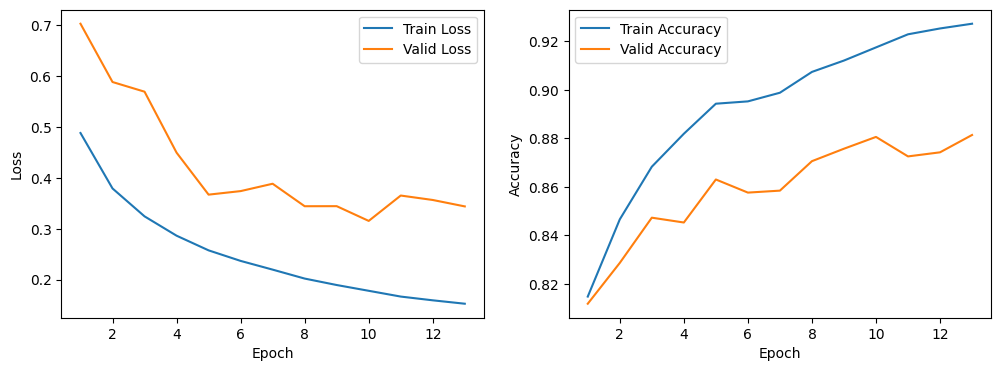

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history_pair in histories for history in history_pair)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)

# 평균 손실 및 정확도 계산
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ Trial2: ensemble (validation 성능을 기준으로 가중치)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 결과 저장 리스트
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

def train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_trial2_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr, early_stopping],
        verbose=0
    )

    model.load_weights(checkpoint_path_ensemble)

    loss, accuracy = model.evaluate(test_dataset)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

for i in range(10):
    print(f"Experiment {i+1}/10")

    # 모델 1 (Baseline1)
    model1 = create_baseline1_model()
    history1, report1, y_pred1, y_true_classes = train_and_evaluate_model(model1, train_dataset, val_dataset, test_dataset, "baseline1")

    # 모델 2 (VGG)
    model2 = create_vgg_model()
    history2, report2, y_pred2, _ = train_and_evaluate_model(model2, train_dataset, val_dataset, test_dataset, "vgg")

    # 모델 3 (DenseNet)
    model3 = create_densenet_model()
    history3, report3, y_pred3, _ = train_and_evaluate_model(model3, train_dataset, val_dataset, test_dataset, "densenet")

    # 모델 4 (ResNet)
    model4 = create_resnet_model()
    history4, report4, y_pred4, _ = train_and_evaluate_model(model4, train_dataset, val_dataset, test_dataset, "resnet")

    # 모델 5 (SqueezeNet)
    model5 = create_squeezenet_model()
    history5, report5, y_pred5, _ = train_and_evaluate_model(model5, train_dataset, val_dataset, test_dataset, "squeezenet")

    # 모델의 검증 정확도
    accuracy1 = history1.history['val_accuracy'][-1]  # Baseline1 모델의 검증 정확도
    accuracy2 = history2.history['val_accuracy'][-1]  # VGG 모델의 검증 정확도
    accuracy3 = history3.history['val_accuracy'][-1]  # DenseNet 모델의 검증 정확도
    accuracy4 = history4.history['val_accuracy'][-1]  # ResNet 모델의 검증 정확도
    accuracy5 = history5.history['val_accuracy'][-1]  # SqueezeNet 모델의 검증 정확도

    # 가중치 계산
    total_accuracy = accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5
    weights = [accuracy1 / total_accuracy, accuracy2 / total_accuracy, accuracy3 / total_accuracy, accuracy4 / total_accuracy, accuracy5 / total_accuracy]

    print(f"Calculated weights: {weights}")

    # 가중 평균 계산
    y_pred_ensemble_weighted = (weights[0] * y_pred1 + weights[1] * y_pred2 + weights[2] * y_pred3 + weights[3] * y_pred4 + weights[4] * y_pred5) / sum(weights)
    y_pred_classes_ensemble_weighted = np.argmax(y_pred_ensemble_weighted, axis=1)

    # 앙상블 분류 보고서 생성
    report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble_weighted, target_names=class_names, output_dict=True)
    accuracy_ensemble = report_ensemble['accuracy']
    recall_ensemble = report_ensemble['weighted avg']['recall']
    precision_ensemble = report_ensemble['weighted avg']['precision']
    f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

    # ECE와 OE 계산
    ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble_weighted)
    oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble_weighted)

    accuracies.append(accuracy_ensemble)
    recalls.append(recall_ensemble)
    precisions.append(precision_ensemble)
    f1_scores.append(f1_score_ensemble)
    ece_values.append(ece_ensemble)
    oe_values.append(oe_ensemble)
    histories.append((history1, history2, history3, history4, history5))

# 앙상블 모델 저장 함수
def save_ensemble_models(models, path):
    if not os.path.exists(path):
        os.makedirs(path)
    for i, model in enumerate(models):
        model.save(os.path.join(path, f'trial2_ensemble_model_{i}.h5'))

# 최종 학습된 앙상블 모델 저장
ensemble_models = [model1, model2, model3, model4, model5]
trial_dir = "/home/iai/Desktop/son/deeplearningproject/trial_model"
save_ensemble_models(ensemble_models, trial_dir)
print(f"Final ensemble models saved at {trial_dir}")


Experiment 1/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9373


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.8875
Calculated weights: [0.2005049182523062, 0.20130214810342664, 0.19997342738970453, 0.20103640911490786, 0.19718309713965476]
Experiment 2/10


2024-06-05 21:59:10.880254: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9385


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8476
Calculated weights: [0.20066577966291757, 0.20372835991409022, 0.20399467797750542, 0.20332889573198445, 0.18828228671350236]
Experiment 3/10


2024-06-05 22:01:29.480625: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9232


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8070
Calculated weights: [0.23749018861439034, 0.23607843522626587, 0.2371764707099316, 0.23984314135201146, 0.049411764097400744]
Experiment 4/10


2024-06-05 22:03:27.722706: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

51/51 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9324


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8488
Calculated weights: [0.20182134740912377, 0.20222311197311518, 0.2028927282380201, 0.20436587363090786, 0.18869693874883306]
Experiment 5/10


2024-06-05 22:05:35.797874: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9379


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8740
Calculated weights: [0.2002388567356695, 0.20249468587065522, 0.20010615711935695, 0.20342357031637753, 0.19373672995794083]
Experiment 6/10


2024-06-05 22:07:32.076252: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9355


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8562
Calculated weights: [0.20221126643080745, 0.20167843036807206, 0.20287731473877102, 0.20394298686424175, 0.18929000159810772]
Experiment 7/10


2024-06-05 22:09:40.112332: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9392


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8611
Calculated weights: [0.2025063313824685, 0.20090654456843474, 0.20277296898239602, 0.20370617472512145, 0.19010798034157927]
Experiment 8/10


2024-06-05 22:11:46.863118: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9244


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8666
Calculated weights: [0.2000796092067008, 0.20273318509626923, 0.2003449603622785, 0.2028658671074372, 0.19397637822731428]
Experiment 9/10


2024-06-05 22:14:21.497843: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.9355


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8697
Calculated weights: [0.19989318183083674, 0.20122846721689658, 0.20109493479352264, 0.2048337520034072, 0.19294966415533685]
Experiment 10/10


2024-06-05 22:16:55.240294: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


51/51 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9176


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8654
Calculated weights: [0.2017333392864132, 0.20306666625807127, 0.19973332943357466, 0.20266666945959727, 0.1927999955623436]


2024-06-05 22:19:08.863371: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3090" frequency: 1695 num_cores: 82 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 23396679680 bandwidth: 936096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Cust

Final ensemble models saved at /home/iai/Desktop/son/deeplearningproject/trial_model


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9459 ± 0.00
Recall: 0.9459 ± 0.00
Precision: 0.9479 ± 0.00
F1-score: 0.9428 ± 0.00
ECE: 0.0366 ± 0.01
OE: 0.0004 ± 0.00


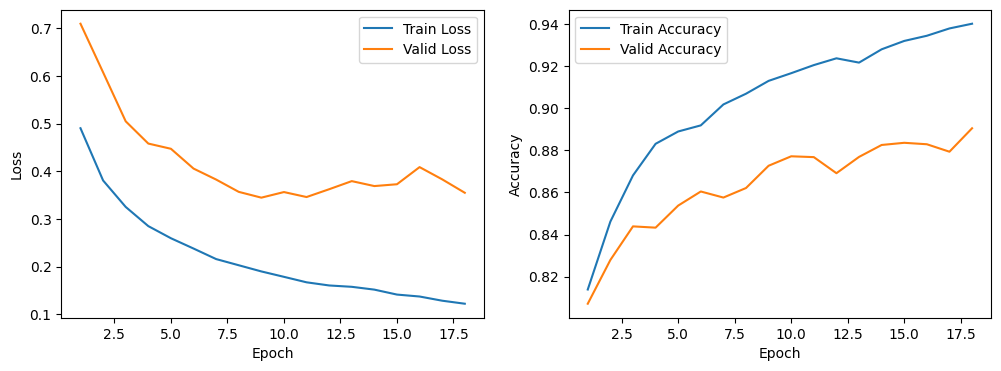

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history_pair in histories for history in history_pair)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)

# 평균 손실 및 정확도 계산
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories for history in history_pair], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ Trial3: ensemble(커널크기 변경) : 음성이미지데이터의 특성인 x축 시간, y축 주파수의 특성을 더 살리기 위해서

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model(kernel_size=(3, 3)):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_trial3_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr, early_stopping],
        verbose=0
    )

    model.load_weights(checkpoint_path_ensemble)

    loss, accuracy = model.evaluate(test_dataset)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

# 커널 크기가 다른 여러 모델 생성
kernel_sizes = [(3, 3), (3, 7), (7, 3), (7, 7)]
histories_all = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []

for experiment in range(10):
    print(f"Experiment {experiment + 1}/10")
    model_list = []
    histories = []
    reports = []
    y_preds = []

    for kernel_size in kernel_sizes:
        model = create_baseline1_model(kernel_size=kernel_size)
        history, report, y_pred, y_true_classes = train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset, f"kernel_{kernel_size[0]}x{kernel_size[1]}")
        model_list.append(model)
        histories.append(history)
        reports.append(report)
        y_preds.append(y_pred)

    # 앙상블 예측
    y_pred_ensemble = np.mean(y_preds, axis=0)
    y_pred_classes_ensemble = np.argmax(y_pred_ensemble, axis=1)

    # 앙상블 분류 보고서 생성
    report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble, target_names=class_names, output_dict=True)
    accuracy_ensemble = report_ensemble['accuracy']
    recall_ensemble = report_ensemble['weighted avg']['recall']
    precision_ensemble = report_ensemble['weighted avg']['precision']
    f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

    # ECE와 OE 계산
    ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble)
    oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble)

    histories_all.append(histories)
    accuracies.append(accuracy_ensemble)
    recalls.append(recall_ensemble)
    precisions.append(precision_ensemble)
    f1_scores.append(f1_score_ensemble)
    ece_values.append(ece_ensemble)
    oe_values.append(oe_ensemble)

# 앙상블 모델 저장 함수
def save_ensemble_models(models, path):
    if not os.path.exists(path):
        os.makedirs(path)
    for i, model in enumerate(models):
        model.save(os.path.join(path, f'trial3_ensemble_model_{i}.h5'))

# 최종 학습된 앙상블 모델 저장
trial_dir = "/home/iai/Desktop/son/deeplearningproject/trial_model"
save_ensemble_models(model_list, trial_dir)
print(f"Final ensemble models saved at {trial_dir}")


Experiment 1/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9195
Experiment 2/10
51/51 [==============================] - 0s 978us/step - loss: 0.2257 - accuracy: 0.9385
Experiment 3/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9293
Experiment 4/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9318
Experiment 5/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.9170
Experiment 6/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9312
Experiment 7/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9275
Experiment 8/10
51/51 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9312
Experiment 9/10
51/51 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9447
Experiment 10/10
51/51 [==============================] - 0s 970us/step

In [ ]:
import numpy as np
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9441 ± 0.00
Recall: 0.9441 ± 0.00
Precision: 0.9447 ± 0.00
F1-score: 0.9414 ± 0.00
ECE: 0.0149 ± 0.00
OE: 0.0016 ± 0.00


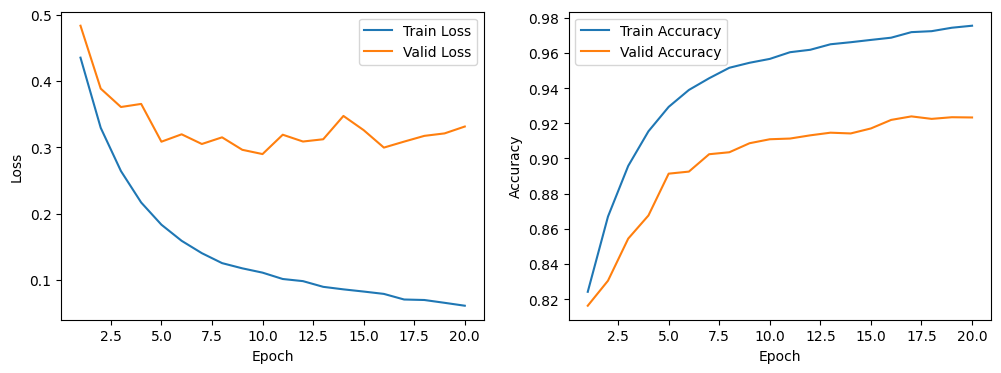

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(max(len(history.history['loss']) for history in history_pair) for history_pair in histories_all)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)

# 평균 손실 및 정확도 계산
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ Trial4: augmentation (음성데이터의 특성을 고려한 augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 생성기 정의
datagen = ImageDataGenerator(
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    # horizontal_flip=True,
    fill_mode='nearest'
)

# 증강된 데이터를 이용한 학습 데이터셋 생성
def augment_dataset(images, labels, datagen, batch_size):
    augmented_images = []
    augmented_labels = []
    for img, label in zip(images, labels):
        img = img.reshape((1,) + img.shape)
        aug_iter = datagen.flow(img, batch_size=1)
        aug_img = aug_iter.next().astype(np.float32)
        augmented_images.append(aug_img.reshape(img.shape[1:]))
        augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)

augmented_train_images, augmented_train_labels = augment_dataset(train_images, train_labels, datagen, batch_size)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
augmented_train_dataset = tf.data.Dataset.from_tensor_slices((augmented_train_images, augmented_train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
def one_hot_encode_dataset(dataset, num_classes):
    def one_hot_encode(image, label):
        return image, tf.one_hot(label, num_classes)
    return dataset.map(one_hot_encode)

# num_classes는 클래스 수에 맞게 수정합니다.
num_classes = 2  # 예시로 2개 클래스인 경우
augmented_train_dataset = one_hot_encode_dataset(augmented_train_dataset, num_classes)
val_dataset = one_hot_encode_dataset(val_dataset, num_classes)
test_dataset = one_hot_encode_dataset(test_dataset, num_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 체크포인트 경로 확인 및 생성
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# 모델 정의 함수
def create_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 결과 저장용 리스트
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")
    model = create_model()

    checkpoint_path_baseline1 = os.path.join(checkpoint_dir, f"best_model_trial4_{i+1}.h5")
    checkpoint_baseline1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_baseline1, monitor='val_loss', save_best_only=True, mode='min')

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = model.fit(
        augmented_train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[checkpoint_baseline1, reduce_lr, early_stopping],
        verbose=1
    )

    histories.append(history)

    model.load_weights(checkpoint_path_baseline1)

    loss, accuracy = model.evaluate(test_dataset)
    accuracies.append(accuracy)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

    recalls.append(report['weighted avg']['recall'])
    precisions.append(report['weighted avg']['precision'])
    f1_scores.append(report['weighted avg']['f1-score'])

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    ece_values.append(ece)
    oe_values.append(oe)


trial_dir = "/home/iai/Desktop/son/deeplearningproject/trial_model"
# 최종 학습된 모델 저장
if not os.path.exists(trial_dir):
    os.makedirs(trial_dir)
final_model_path = os.path.join(trial_dir, "trial_4.h5")
model.save(final_model_path)
print(f"Final ensemble model saved at {final_model_path}")


Experiment 1/10
Epoch 1/100
153/153 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.8015 - val_loss: 0.5116 - val_accuracy: 0.8064
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8134 - val_loss: 0.4829 - val_accuracy: 0.8101
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8250 - val_loss: 0.4654 - val_accuracy: 0.8162
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8334 - val_loss: 0.5041 - val_accuracy: 0.7923
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8441 - val_loss: 0.7598 - val_accuracy: 0.6380
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8564 - val_loss: 0.6018 - val_accuracy: 0.7167
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8656 - val_loss: 0.5593 - val_

/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

153/153 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.8058 - val_loss: 0.5564 - val_accuracy: 0.8064
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8086 - val_loss: 0.5200 - val_accuracy: 0.8082
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8156 - val_loss: 0.5322 - val_accuracy: 0.8015
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8293 - val_loss: 0.5547 - val_accuracy: 0.7775
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8406 - val_loss: 0.6481 - val_accuracy: 0.8070
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8535 - val_loss: 0.6647 - val_accuracy: 0.7904
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8615 - val_loss: 0.5341 - val_accuracy: 0.7750
Epoch 8/100

In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.8148 ± 0.01
Recall: 0.8148 ± 0.01
Precision: 0.7802 ± 0.05
F1-score: 0.7493 ± 0.02
ECE: 0.0536 ± 0.03
OE: 0.0200 ± 0.01


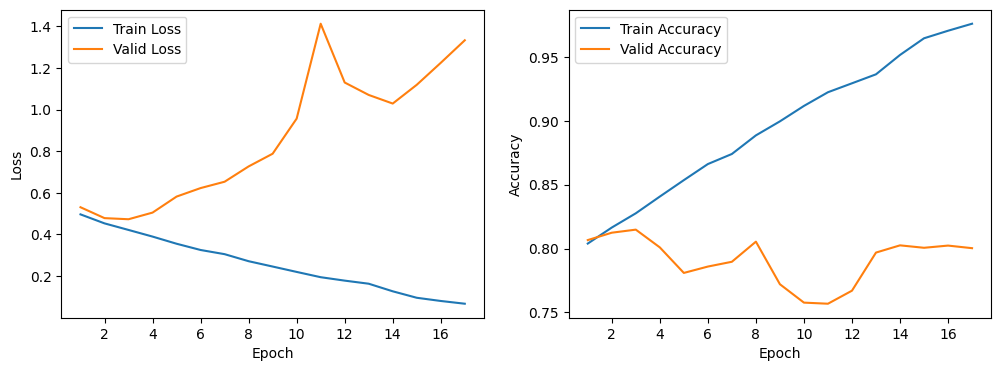

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history in histories)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history in histories], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ Trial5 : Augmentation + ensemble(앙상블중에서 가장 결과가 잘 나온 Trial)

- Trial1 - acc : 94.39, ece : 4.09

- Trial2 - acc : 94.59, ece : 3.66

- Trial3 - acc : 94.41, ece : 1.49

#### 💡-> Trial3으로 선정

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model(kernel_size=(3, 3)):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, augmented_train_dataset, val_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_trial5_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        augmented_train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr, early_stopping],
        verbose=0
    )

    model.load_weights(checkpoint_path_ensemble)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

# 커널 크기가 다른 여러 모델 생성
kernel_sizes = [(3, 3), (3, 7), (7, 3), (7, 7)]
histories_all = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []

for experiment in range(10):
    print(f"Experiment {experiment + 1}/10")
    model_list = []
    histories = []
    reports = []
    y_preds = []

    for kernel_size in kernel_sizes:
        model = create_baseline1_model(kernel_size=kernel_size)
        history, report, y_pred, y_true_classes = train_and_evaluate_model(model, augmented_train_dataset, val_dataset, test_dataset, f"kernel_{kernel_size[0]}x{kernel_size[1]}")
        model_list.append(model)
        histories.append(history)
        reports.append(report)
        y_preds.append(y_pred)

    # 앙상블 예측
    y_pred_ensemble = np.mean(y_preds, axis=0)
    y_pred_classes_ensemble = np.argmax(y_pred_ensemble, axis=1)

    # 앙상블 분류 보고서 생성
    report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble, target_names=class_names, output_dict=True)
    accuracy_ensemble = report_ensemble['accuracy']
    recall_ensemble = report_ensemble['weighted avg']['recall']
    precision_ensemble = report_ensemble['weighted avg']['precision']
    f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

    # ECE와 OE 계산
    ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble)
    oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble)

    histories_all.append(histories)
    accuracies.append(accuracy_ensemble)
    recalls.append(recall_ensemble)
    precisions.append(precision_ensemble)
    f1_scores.append(f1_score_ensemble)
    ece_values.append(ece_ensemble)
    oe_values.append(oe_ensemble)

# 앙상블 모델 저장 함수
def save_ensemble_models(models, path):
    if not os.path.exists(path):
        os.makedirs(path)
    for i, model in enumerate(models):
        model.save(os.path.join(path, f'trial5_ensemble_model_{i}.h5'))

# 최종 학습된 앙상블 모델 저장
trial_dir = "/home/iai/Desktop/son/deeplearningproject/trial_model"
save_ensemble_models(model_list, trial_dir)
print(f"Final ensemble models saved at {trial_dir}")


Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10
Final ensemble models saved at /home/iai/Desktop/son/deeplearningproject/trial_model


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.8208 ± 0.01
Recall: 0.8208 ± 0.01
Precision: 0.8291 ± 0.02
F1-score: 0.7549 ± 0.02
ECE: 0.0321 ± 0.01
OE: 0.0133 ± 0.01


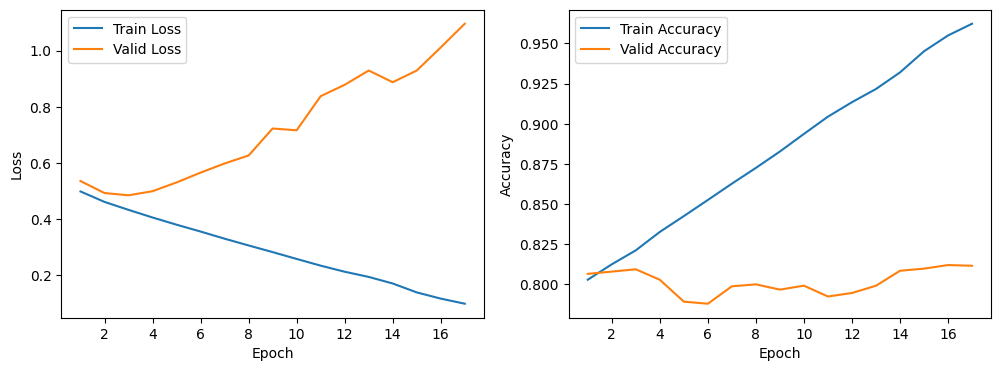

In [ ]:
# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(max(len(history.history['loss']) for history in history_pair) for history_pair in histories_all)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)

# 평균 손실 및 정확도 계산
avg_train_loss = np.mean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_val_loss = np.mean([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_train_accuracy = np.mean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)
avg_val_accuracy = np.mean([np.pad(history.history['val_accuracy'], (0, max_epochs - len(history.history['val_accuracy'])), mode='constant', constant_values=np.nan) for history_pair in histories_all for history in history_pair], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ 가장 좋은 모델, 배포용으로 Train + validation에 대해 학습 후 저장

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)
# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)


Found 8135 files belonging to 2 classes.


Ensemble Accuracy: 0.9483712354025814
Ensemble Recall: 0.9483712354025814
Ensemble Precision: 0.9482634568251768
Ensemble F1-score: 0.9463829559818802
Ensemble ECE: 0.016068652427921878
Ensemble OE: 0.013993621019036333
Final ensemble models saved at /home/iai/Desktop/son/deeplearningproject/final_model


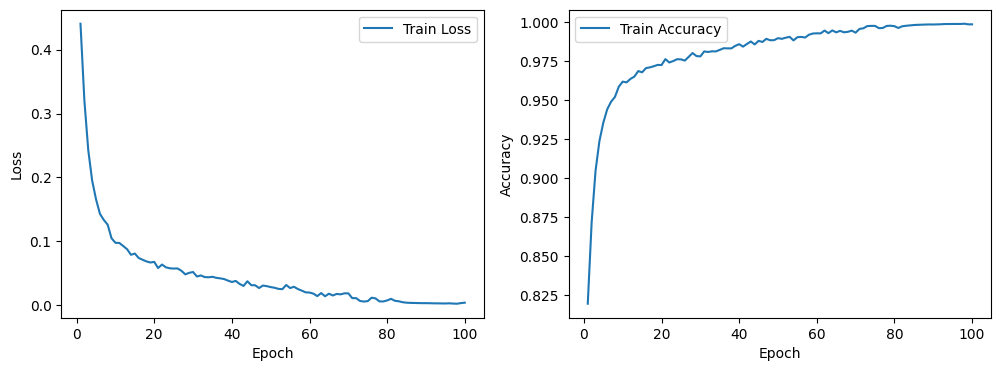

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model(kernel_size=(3, 3)):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, kernel_size, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, train_dataset, test_dataset, model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_trial3_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble, reduce_lr, early_stopping],
        verbose=0
    )

    model.load_weights(checkpoint_path_ensemble)

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

# 커널 크기가 다른 여러 모델 생성
kernel_sizes = [(3, 3), (3, 7), (7, 3), (7, 7)]
histories_all = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
model_list = []
y_preds = []

for kernel_size in kernel_sizes:
    model = create_baseline1_model(kernel_size=kernel_size)
    history, report, y_pred, y_true_classes = train_and_evaluate_model(model, train_dataset, test_dataset, f"kernel_{kernel_size[0]}x{kernel_size[1]}")
    model_list.append(model)
    histories_all.append(history)
    y_preds.append(y_pred)

# 앙상블 예측
y_pred_ensemble = np.mean(y_preds, axis=0)
y_pred_classes_ensemble = np.argmax(y_pred_ensemble, axis=1)

# 앙상블 분류 보고서 생성
report_ensemble = classification_report(y_true_classes, y_pred_classes_ensemble, target_names=class_names, output_dict=True)
accuracy_ensemble = report_ensemble['accuracy']
recall_ensemble = report_ensemble['weighted avg']['recall']
precision_ensemble = report_ensemble['weighted avg']['precision']
f1_score_ensemble = report_ensemble['weighted avg']['f1-score']

print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(f"Ensemble Recall: {recall_ensemble}")
print(f"Ensemble Precision: {precision_ensemble}")
print(f"Ensemble F1-score: {f1_score_ensemble}")

# ECE와 OE 계산
ece_ensemble = calculate_ece(y_true_classes, y_pred_ensemble)
oe_ensemble = calculate_oe(y_true_classes, y_pred_ensemble)

print(f"Ensemble ECE: {ece_ensemble}")
print(f"Ensemble OE: {oe_ensemble}")

# 앙상블 모델 저장 함수
def save_ensemble_models(models, path):
    if not os.path.exists(path):
        os.makedirs(path)
    for i, model in enumerate(models):
        model.save(os.path.join(path, f'final_ensemble_model_{i}.h5'))

# 최종 학습된 앙상블 모델 저장
final_model_dir = "/home/iai/Desktop/son/deeplearningproject/final_model"
save_ensemble_models(model_list, final_model_dir)
print(f"Final ensemble models saved at {final_model_dir}")

# 에포크별 평균 손실 및 정확도 계산
max_epochs = max(len(history.history['loss']) for history in histories_all)  # 각 실험의 최대 에포크 수를 확인
epochs = range(1, max_epochs + 1)

# 평균 손실 및 정확도 계산
avg_train_loss = np.nanmean([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), mode='constant', constant_values=np.nan) for history in histories_all], axis=0)
avg_train_accuracy = np.nanmean([np.pad(history.history['accuracy'], (0, max_epochs - len(history.history['accuracy'])), mode='constant', constant_values=np.nan) for history in histories_all], axis=0)

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##📌 Trial1-5의 결과 : Trial3이 가장 좋은 결과가 나옴.
#### Baseline과의 비교

Baseline1
- Accuracy: 0.9103 ± 0.01
- Recall: 0.9103 ± 0.01
- Precision: 0.9080 ± 0.01
- F1-score: 0.9045 ± 0.02
- ECE: 0.0414 ± 0.00
- OE: 0.0400 ± 0.00

Trial3
- Accuracy: 0.9441 ± 0.00
- Recall: 0.9441 ± 0.00
- Precision: 0.9447 ± 0.00
- F1-score: 0.9414 ± 0.00
- ECE: 0.0149 ± 0.00
- OE: 0.0016 ± 0.00

### 💬 정확도가 약 3%정도의 향상이 있고, ECE 및 OE 또한 3% 이상 감소가 있음 -> 앙상블의 효과로 정확도와 보정이 확실히 일어난 것을 확인가능함.



#✅ 앞선 결과에 이어서 자원 효율화를 위한 모델의 경량화와 함께 정확도 유지를 위한 Knowledge Distillation 방법 이용

#### 💬 Knowledge Distillation 개념 설명

- **Knowledge Distillation (KD)**:
  - KD는 큰 모델(Teacher Model)에서 작은 모델(Student Model)로 지식을 전이하여, 작은 모델이 더 효율적으로 학습할 수 있도록 돕는 기법임. 이는 모델의 경량화와 함께 성능을 유지하거나 향상시키는 데 유용함.

  - **Teacher Model**: 이전 trial1 ~ trial5 중 성능이 가장 좋았던 모델을 사용함. 본 연구에서는 Trial3가 가장 우수한 성능을 보였기 때문에 Teacher Model로 선정되었음.
  - **Student Model**: Baseline1 모델을 사용하여 경량화된 모델로서의 역할을 함.


<img src="https://drive.google.com/uc?id=1WmLlwMSH9VhFwU7l1NSAGhfqpbvszWw5" height="300" width="600">


  - **적용 방법**:
    1. **Soft Labels 사용**: Teacher Model의 예측 출력을 Soft Label로 사용하여 Student Model이 학습하도록 함. Soft Label은 Teacher Model의 출력 확률 분포를 사용하여 Student Model이 더 풍부한 정보를 학습할 수 있게 함.
    2. **Temperature (T) 조절**: Soft Label의 스무딩 정도를 조정하기 위해 Temperature 값을 사용함. 높은 T 값은 확률 분포를 더 부드럽게 만들어 Student Model이 더 일반화된 패턴을 학습하게 도와줌.
    3. **Loss Function**: Student Model의 학습에는 두 가지 손실 함수가 사용됨:
        - **Student Loss**: 실제 라벨과 Student Model의 예측 간의 차이. 전통적인 Cross Entropy Loss를 사용함.
        - **Distillation Loss**: Soft Label과 Student Model의 예측 간의 차이. KL Divergence Loss를 사용함.
        - **결합된 Loss Function**: 두 손실의 가중합을 사용하여 모델을 최적화함.

- **Loss Function 상세 설명**:
    - **Student Loss**: 실제 라벨 y와 Student Model의 예측 y 간의 차이를 계산함. 일반적으로 Cross Entropy Loss를 사용함.

    - **Distillation Loss**: Teacher Model의 Soft Label \( q \)와 Student Model의 예측 \( p \) 간의 차이를 계산함. KL Divergence를 사용하여 두 확률 분포 간의 차이를 측정함.

    - **Temperature (T)**: Soft Label을 생성할 때 사용되는 매개변수로, Teacher Model의 예측 logits를 부드럽게 만들어 Student Model이 학습하기 쉽게 함. T 값이 높을수록 확률 분포가 부드러워짐.


- **목표**: T 값을 조절하면서 정확도와 Calibration 성능이 가장 잘 나오는 T 값을 찾아야함. (실험에서는 T=1, 2, 5, 10 값을 사용하여 최적의 T 값을 탐색함.)


### 💬 Teacher model: 이전 trial1 ~ trial5 중 성능이 가장 좋았던 모델, Student model: Baseline1

- Trial1 - acc : 94.39, ece : 4.09

- Trial2 - acc : 94.59, ece : 3.66

- Trial3 - acc : 94.41, ece : 1.49

- Trial4 - acc : 81.48, ece : 5.36

- Trial5 - acc : 82.08, ece : 3.21

💡 -> Trial3으로 선정

#### 💬 T 값을 조절하면서 정확도와 calibration 성능이 가장 잘 나오는 T값을 찾는다. (1,2,5,10,20)

###✅ KD 하이퍼파라미터 설정 및 튜닝

- T : 가장 적절한 Temperature 값을 찾도록 여러 값을 실험해봄
- alpha : Student model의 cross entropy 비중보다 Distillation의 비중을 높여 teacher 모델을 더 많은 특징을 distillation 받도록 하기 위해 0.3으로 설정

### ✅ T=1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)

# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=random_seed)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)


Found 8135 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

# 앙상블 모델 불러오기
def load_ensemble_models(path, num_models):
    models = []
    for i in range(num_models):
        model_path = os.path.join(path, f'final_ensemble_model_{i}.h5')
        models.append(tf.keras.models.load_model(model_path))
    return models

# 앙상블 예측 생성 함수
def ensemble_predict(models, data):
    predictions = [model(data, training=False) for model in models]
    return tf.reduce_mean(predictions, axis=0)


# 앙상블 모델 로드
ensemble_models_path = "/home/iai/Desktop/son/deeplearningproject/final_model"
num_ensemble_models = 4  # 앙상블 모델의 수
teacher_models = load_ensemble_models(ensemble_models_path, num_ensemble_models)

# Student 모델 정의
def create_model(kernel_size=(3, 3)):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Knowledge Distillation Loss 정의
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher_models, temperature=1.0, alpha=0.3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher_models = teacher_models
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn

    def train_step(self, data):
        x, y = data
        # 앙상블 모델의 예측
        teacher_predictions = ensemble_predict(self.teacher_models, x)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": loss, "student_loss": student_loss, "distillation_loss": distillation_loss})
        return results



    def test_step(self, data):
        x, y = data
        # 학생 모델로 예측 수행
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": student_loss})  # 'loss'로 명확하게 지정
        return results


accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    student_model = create_model()
    distillation_model = DistillationModel(student=student_model, teacher_models=teacher_models, temperature=1.0, alpha=0.3)
    distillation_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
        distillation_loss_fn=tf.keras.losses.KLDivergence(),
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = distillation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[reduce_lr, early_stopping],
        verbose=0
    )

    histories.append(history)
    # Classification report
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = student_model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9149 ± 0.01
Recall: 0.9149 ± 0.01
Precision: 0.9128 ± 0.01
F1-score: 0.9114 ± 0.01
ECE: 0.0441 ± 0.01
OE: 0.0400 ± 0.01


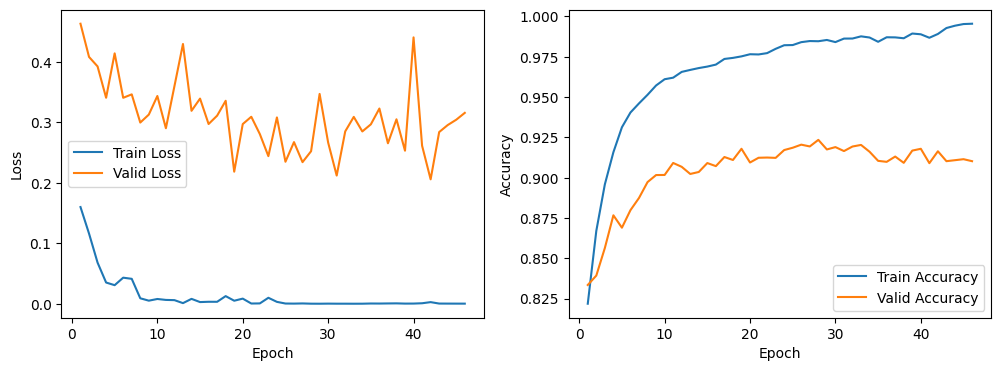

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가장 긴 에포크 길이 찾기
max_epochs = max([len(history.history['loss']) for history in histories])

# 각 history의 길이를 맞추기 위해 NaN으로 채우기
train_losses = np.array([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan) for history in histories])
val_losses = np.array([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan) for history in histories])
train_accuracies = np.array([np.pad(history.history['categorical_accuracy'], (0, max_epochs - len(history.history['categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])
val_accuracies = np.array([np.pad(history.history['val_categorical_accuracy'], (0, max_epochs - len(history.history['val_categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])

# NaN 값을 무시하고 평균 계산
avg_train_loss = np.nanmean(train_losses, axis=0)
avg_val_loss = np.nanmean(val_losses, axis=0)
avg_train_accuracy = np.nanmean(train_accuracies, axis=0)
avg_val_accuracy = np.nanmean(val_accuracies, axis=0)

# 학습 과정 시각화
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ T=2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

# 앙상블 모델 불러오기
def load_ensemble_models(path, num_models):
    models = []
    for i in range(num_models):
        model_path = os.path.join(path, f'final_ensemble_model_{i}.h5')
        models.append(tf.keras.models.load_model(model_path))
    return models

# 앙상블 예측 생성 함수
def ensemble_predict(models, data):
    predictions = [model(data, training=False) for model in models]
    return tf.reduce_mean(predictions, axis=0)


# 앙상블 모델 로드
ensemble_models_path = "/home/iai/Desktop/son/deeplearningproject/final_model"
num_ensemble_models = 4  # 앙상블 모델의 수
teacher_models = load_ensemble_models(ensemble_models_path, num_ensemble_models)

# Student 모델 정의
def create_model(kernel_size=(3, 3)):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Knowledge Distillation Loss 정의
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher_models, temperature=2.0, alpha=0.3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher_models = teacher_models
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn

    def train_step(self, data):
        x, y = data
        # 앙상블 모델의 예측
        teacher_predictions = ensemble_predict(self.teacher_models, x)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": loss, "student_loss": student_loss, "distillation_loss": distillation_loss})
        return results



    def test_step(self, data):
        x, y = data
        # 학생 모델로 예측 수행
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": student_loss})  # 'loss'로 명확하게 지정
        return results


accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    student_model = create_model()
    distillation_model = DistillationModel(student=student_model, teacher_models=teacher_models, temperature=2.0, alpha=0.3)
    distillation_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
        distillation_loss_fn=tf.keras.losses.KLDivergence(),
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = distillation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[reduce_lr, early_stopping],
        verbose=0
    )

    histories.append(history)
    # Classification report
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = student_model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9095 ± 0.01
Recall: 0.9095 ± 0.01
Precision: 0.9076 ± 0.01
F1-score: 0.9068 ± 0.01
ECE: 0.0537 ± 0.01
OE: 0.0521 ± 0.01


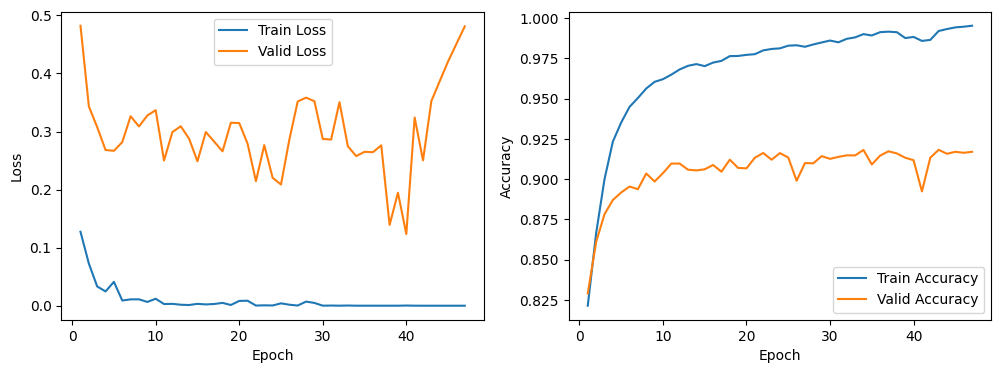

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가장 긴 에포크 길이 찾기
max_epochs = max([len(history.history['loss']) for history in histories])

# 각 history의 길이를 맞추기 위해 NaN으로 채우기
train_losses = np.array([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan) for history in histories])
val_losses = np.array([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan) for history in histories])
train_accuracies = np.array([np.pad(history.history['categorical_accuracy'], (0, max_epochs - len(history.history['categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])
val_accuracies = np.array([np.pad(history.history['val_categorical_accuracy'], (0, max_epochs - len(history.history['val_categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])

# NaN 값을 무시하고 평균 계산
avg_train_loss = np.nanmean(train_losses, axis=0)
avg_val_loss = np.nanmean(val_losses, axis=0)
avg_train_accuracy = np.nanmean(train_accuracies, axis=0)
avg_val_accuracy = np.nanmean(val_accuracies, axis=0)

# 학습 과정 시각화
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ T=5

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

# 앙상블 모델 불러오기
def load_ensemble_models(path, num_models):
    models = []
    for i in range(num_models):
        model_path = os.path.join(path, f'final_ensemble_model_{i}.h5')
        models.append(tf.keras.models.load_model(model_path))
    return models

# 앙상블 예측 생성 함수
def ensemble_predict(models, data):
    predictions = [model(data, training=False) for model in models]
    return tf.reduce_mean(predictions, axis=0)


# 앙상블 모델 로드
ensemble_models_path = "/home/iai/Desktop/son/deeplearningproject/final_model"
num_ensemble_models = 4  # 앙상블 모델의 수
teacher_models = load_ensemble_models(ensemble_models_path, num_ensemble_models)

# Student 모델 정의
def create_model(kernel_size=(3, 3)):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Knowledge Distillation Loss 정의
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher_models, temperature=5.0, alpha=0.3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher_models = teacher_models
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn

    def train_step(self, data):
        x, y = data
        # 앙상블 모델의 예측
        teacher_predictions = ensemble_predict(self.teacher_models, x)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": loss, "student_loss": student_loss, "distillation_loss": distillation_loss})
        return results



    def test_step(self, data):
        x, y = data
        # 학생 모델로 예측 수행
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": student_loss})  # 'loss'로 명확하게 지정
        return results


accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    student_model = create_model()
    distillation_model = DistillationModel(student=student_model, teacher_models=teacher_models, temperature=5.0, alpha=0.3)
    distillation_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
        distillation_loss_fn=tf.keras.losses.KLDivergence(),
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = distillation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[reduce_lr, early_stopping],
        verbose=0
    )

    histories.append(history)
    # Classification report
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = student_model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9187 ± 0.01
Recall: 0.9187 ± 0.01
Precision: 0.9168 ± 0.01
F1-score: 0.9148 ± 0.01
ECE: 0.0469 ± 0.01
OE: 0.0436 ± 0.01


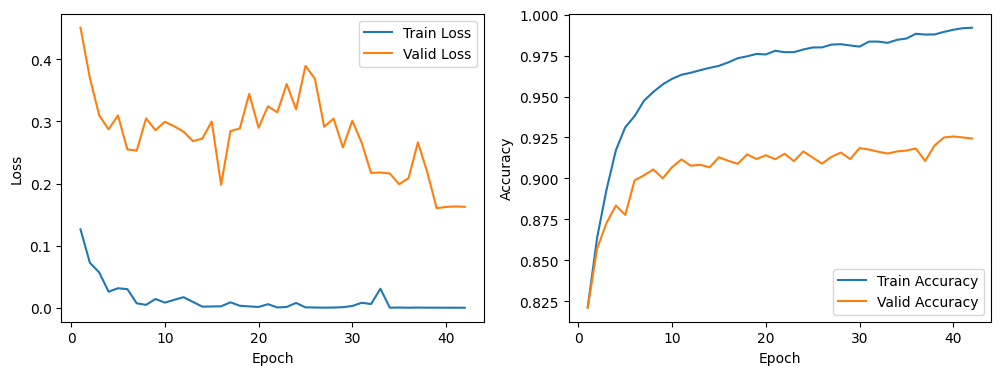

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가장 긴 에포크 길이 찾기
max_epochs = max([len(history.history['loss']) for history in histories])

# 각 history의 길이를 맞추기 위해 NaN으로 채우기
train_losses = np.array([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan) for history in histories])
val_losses = np.array([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan) for history in histories])
train_accuracies = np.array([np.pad(history.history['categorical_accuracy'], (0, max_epochs - len(history.history['categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])
val_accuracies = np.array([np.pad(history.history['val_categorical_accuracy'], (0, max_epochs - len(history.history['val_categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])

# NaN 값을 무시하고 평균 계산
avg_train_loss = np.nanmean(train_losses, axis=0)
avg_val_loss = np.nanmean(val_losses, axis=0)
avg_train_accuracy = np.nanmean(train_accuracies, axis=0)
avg_val_accuracy = np.nanmean(val_accuracies, axis=0)

# 학습 과정 시각화
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ T=10

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

# 앙상블 모델 불러오기
def load_ensemble_models(path, num_models):
    models = []
    for i in range(num_models):
        model_path = os.path.join(path, f'final_ensemble_model_{i}.h5')
        models.append(tf.keras.models.load_model(model_path))
    return models

# 앙상블 예측 생성 함수
def ensemble_predict(models, data):
    predictions = [model(data, training=False) for model in models]
    return tf.reduce_mean(predictions, axis=0)


# 앙상블 모델 로드
ensemble_models_path = "/home/iai/Desktop/son/deeplearningproject/final_model"
num_ensemble_models = 4  # 앙상블 모델의 수
teacher_models = load_ensemble_models(ensemble_models_path, num_ensemble_models)

# Student 모델 정의
def create_model(kernel_size=(3, 3)):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Knowledge Distillation Loss 정의
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher_models, temperature=10.0, alpha=0.3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher_models = teacher_models
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn

    def train_step(self, data):
        x, y = data
        # 앙상블 모델의 예측
        teacher_predictions = ensemble_predict(self.teacher_models, x)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": loss, "student_loss": student_loss, "distillation_loss": distillation_loss})
        return results



    def test_step(self, data):
        x, y = data
        # 학생 모델로 예측 수행
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": student_loss})  # 'loss'로 명확하게 지정
        return results


accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    student_model = create_model()
    distillation_model = DistillationModel(student=student_model, teacher_models=teacher_models, temperature=10.0, alpha=0.3)
    distillation_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
        distillation_loss_fn=tf.keras.losses.KLDivergence(),
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = distillation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[reduce_lr, early_stopping],
        verbose=0
    )

    histories.append(history)
    # Classification report
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = student_model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9059 ± 0.02
Recall: 0.9059 ± 0.02
Precision: 0.9051 ± 0.01
F1-score: 0.8996 ± 0.02
ECE: 0.0556 ± 0.01
OE: 0.0521 ± 0.01


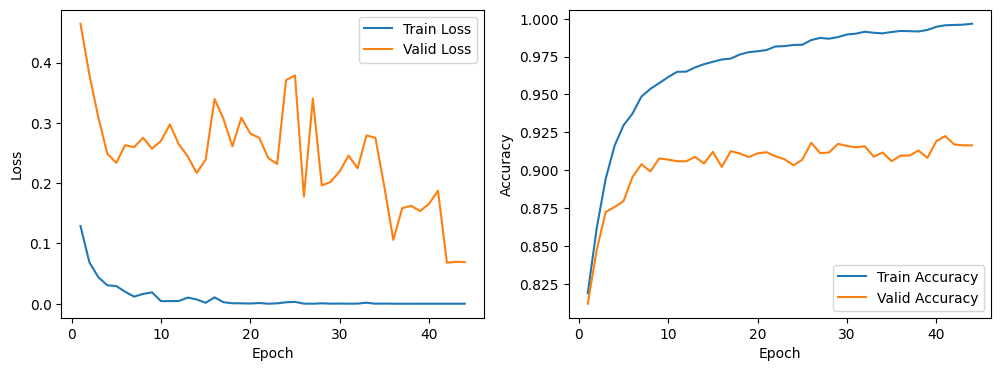

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가장 긴 에포크 길이 찾기
max_epochs = max([len(history.history['loss']) for history in histories])

# 각 history의 길이를 맞추기 위해 NaN으로 채우기
train_losses = np.array([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan) for history in histories])
val_losses = np.array([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan) for history in histories])
train_accuracies = np.array([np.pad(history.history['categorical_accuracy'], (0, max_epochs - len(history.history['categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])
val_accuracies = np.array([np.pad(history.history['val_categorical_accuracy'], (0, max_epochs - len(history.history['val_categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])

# NaN 값을 무시하고 평균 계산
avg_train_loss = np.nanmean(train_losses, axis=0)
avg_val_loss = np.nanmean(val_losses, axis=0)
avg_train_accuracy = np.nanmean(train_accuracies, axis=0)
avg_val_accuracy = np.nanmean(val_accuracies, axis=0)

# 학습 과정 시각화
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### ✅ t=20

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import os

# 앙상블 모델 불러오기
def load_ensemble_models(path, num_models):
    models = []
    for i in range(num_models):
        model_path = os.path.join(path, f'final_ensemble_model_{i}.h5')
        models.append(tf.keras.models.load_model(model_path))
    return models

# 앙상블 예측 생성 함수
def ensemble_predict(models, data):
    predictions = [model(data, training=False) for model in models]
    return tf.reduce_mean(predictions, axis=0)


# 앙상블 모델 로드
ensemble_models_path = "/home/iai/Desktop/son/deeplearningproject/final_model"
num_ensemble_models = 4  # 앙상블 모델의 수
teacher_models = load_ensemble_models(ensemble_models_path, num_ensemble_models)

# Student 모델 정의
def create_model(kernel_size=(3, 3)):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Knowledge Distillation Loss 정의
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher_models, temperature=20.0, alpha=0.3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher_models = teacher_models
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn

    def train_step(self, data):
        x, y = data
        # 앙상블 모델의 예측
        teacher_predictions = ensemble_predict(self.teacher_models, x)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": loss, "student_loss": student_loss, "distillation_loss": distillation_loss})
        return results



    def test_step(self, data):
        x, y = data
        # 학생 모델로 예측 수행
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"loss": student_loss})  # 'loss'로 명확하게 지정
        return results


accuracies = []
recalls = []
precisions = []
f1_scores = []
ece_values = []
oe_values = []
histories = []

for i in range(10):
    print(f"Experiment {i+1}/10")

    student_model = create_model()
    distillation_model = DistillationModel(student=student_model, teacher_models=teacher_models, temperature=20.0, alpha=0.3)
    distillation_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
        distillation_loss_fn=tf.keras.losses.KLDivergence(),
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = distillation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        callbacks=[reduce_lr, early_stopping],
        verbose=0
    )

    histories.append(history)
    # Classification report
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = student_model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    accuracy = report['accuracy']
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']
    f1_score = report['weighted avg']['f1-score']

    ece = calculate_ece(y_true_classes, y_pred)
    oe = calculate_oe(y_true_classes, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    ece_values.append(ece)
    oe_values.append(oe)

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

Experiment 1/10
Experiment 2/10
Experiment 3/10
Experiment 4/10
Experiment 5/10
Experiment 6/10
Experiment 7/10
Experiment 8/10
Experiment 9/10
Experiment 10/10


In [ ]:
# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

f1_score_mean = np.mean(f1_scores)
f1_score_std = np.std(f1_scores)

ece_mean = np.mean(ece_values)
ece_std = np.std(ece_values)

oe_mean = np.mean(oe_values)
oe_std = np.std(oe_values)

# 결과 출력
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.2f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.2f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.2f}")
print(f"F1-score: {f1_score_mean:.4f} ± {f1_score_std:.2f}")
print(f"ECE: {ece_mean:.4f} ± {ece_std:.2f}")
print(f"OE: {oe_mean:.4f} ± {oe_std:.2f}")

Accuracy: 0.9117 ± 0.01
Recall: 0.9117 ± 0.01
Precision: 0.9089 ± 0.01
F1-score: 0.9083 ± 0.01
ECE: 0.0510 ± 0.01
OE: 0.0470 ± 0.01


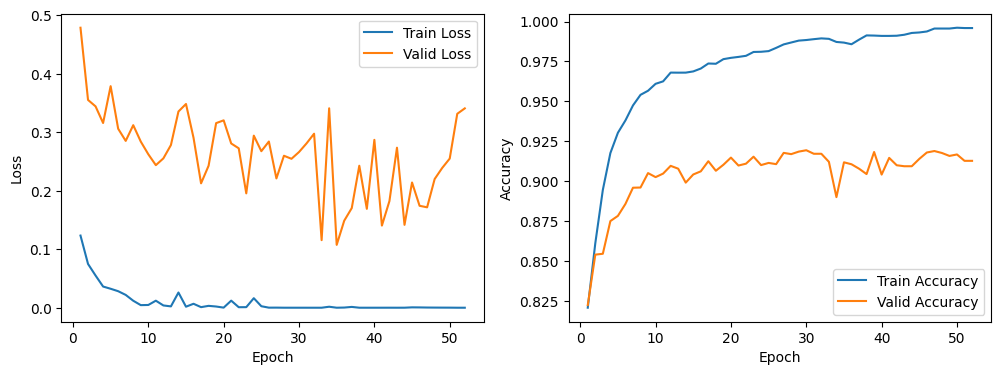

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가장 긴 에포크 길이 찾기
max_epochs = max([len(history.history['loss']) for history in histories])

# 각 history의 길이를 맞추기 위해 NaN으로 채우기
train_losses = np.array([np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan) for history in histories])
val_losses = np.array([np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan) for history in histories])
train_accuracies = np.array([np.pad(history.history['categorical_accuracy'], (0, max_epochs - len(history.history['categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])
val_accuracies = np.array([np.pad(history.history['val_categorical_accuracy'], (0, max_epochs - len(history.history['val_categorical_accuracy'])), 'constant', constant_values=np.nan) for history in histories])

# NaN 값을 무시하고 평균 계산
avg_train_loss = np.nanmean(train_losses, axis=0)
avg_val_loss = np.nanmean(val_losses, axis=0)
avg_train_accuracy = np.nanmean(train_accuracies, axis=0)
avg_val_accuracy = np.nanmean(val_accuracies, axis=0)

# 학습 과정 시각화
epochs = range(1, max_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Train Loss')
plt.plot(epochs, avg_val_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Train Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#### 💡 KD를 했을 때, T=5일 때 가장 정확도가 높다.

T=1
- Accuracy: 0.9149 ± 0.01
- Recall: 0.9149 ± 0.01
- Precision: 0.9128 ± 0.01
- F1-score: 0.9114 ± 0.01
- ECE: 0.0441 ± 0.01
- OE: 0.0400 ± 0.01

T=2
- Accuracy: 0.9095 ± 0.01
- Recall: 0.9095 ± 0.01
- Precision: 0.9076 ± 0.01
- F1-score: 0.9068 ± 0.01
- ECE: 0.0537 ± 0.01
- OE: 0.0521 ± 0.01

T=5
- Accuracy: 0.9187 ± 0.01
- Recall: 0.9187 ± 0.01
- Precision: 0.9168 ± 0.01
- F1-score: 0.9148 ± 0.01
- ECE: 0.0469 ± 0.01
- OE: 0.0436 ± 0.01

T=10
- Accuracy: 0.9059 ± 0.02
- Recall: 0.9059 ± 0.02
- Precision: 0.9051 ± 0.01
- F1-score: 0.8996 ± 0.02
- ECE: 0.0556 ± 0.01
- OE: 0.0521 ± 0.01

T=20
- Accuracy: 0.9117 ± 0.01
- Recall: 0.9117 ± 0.01
- Precision: 0.9089 ± 0.01
- F1-score: 0.9083 ± 0.01
- ECE: 0.0510 ± 0.01
- OE: 0.0470 ± 0.01

</br>

#####  💡 Baseline과의 비교

Baseline1
- Accuracy: 0.9103 ± 0.01
- Recall: 0.9103 ± 0.01
- Precision: 0.9080 ± 0.01
- F1-score: 0.9045 ± 0.02
- ECE: 0.0414 ± 0.00
- OE: 0.0400 ± 0.00

T=5
- Accuracy: 0.9187 ± 0.01
- Recall: 0.9187 ± 0.01
- Precision: 0.9168 ± 0.01
- F1-score: 0.9148 ± 0.01
- ECE: 0.0469 ± 0.01
- OE: 0.0436 ± 0.01

</br>

### 💬 Baseline1보다 Accuracy 0.84퍼센트 향상, 하지만 ECE 및 OE의 작은 상승이 있음. 정확도가 향상되었기에 Baseline대신 경량화된 모델로서 충분히 사용할 수 있지만 기대했던 만큼의 효과가 나오지는 않았음.




### 💬장애를 진단하는 시설에서 리소스가 충분하다면 trial3의 앙상블 모델을 사용하여 정확도, calibration이 잘 된 모델을 사용하면 됨.

### 💬만약 부족하다면, baseline1보다 정확도가 향상된 KD를 사용한 모델을 사용하면 같은 크기의 모델이지만 더욱 정확도가 향상된 모델을 사용할 수 있어 효율적임.

### 📌 7. Result

##### 💬 <b>결과 및 성과</b>
- **음성 데이터 전처리**: 음성 데이터를 mel 스펙트로그램 이미지로 변환하여 기존의 이미지 처리 기법을 적용한 결과, 음성 데이터의 특성을 효과적으로 반영할 수 있었음.
- **앙상블 모델**: 여러 모델을 조합하여 단일 모델보다 높은 정확도와 신뢰성을 달성하였음. 특히 trial3의 결과가 가장 우수하여 teacher 모델로 선택되었음.
- **Knowledge Distillation 모델**: 경량화된 모델로 높은 정확도를 유지하면서도 자원 제한 환경에서도 효과적으로 동작함을 확인했음. 특히 t=5일 때 가장 좋은 성능을 보였음.
- **모델 성능 평가**:
  - **Accuracy**: 앙상블 모델과 KD 모델 모두 높은 정확도를 기록함.
  - **Expected Calibration Error (ECE)**: 앙상블 기법이 모델의 예측 결과에 대한 신뢰성을 높여 ECE를 줄임.
  - **Overconfidence Error (OE)**: 앙상블 기법이 모델의 과잉 신뢰를 줄여 OE를 감소시킴.

##### 💬 <b>한계점</b>
- **데이터 길이의 제한**: 전처리 과정에서 모든 음성 데이터를 일괄적으로 1.28초 길이로 분할하였습니다. 이는 짧은 샘플만 가지고도 분류할 수 있는 모델을 생성했다는 장점이 있지만, 단어와 글자가 중간에 잘려 음성 데이터의 언어적 특징이 제대로 학습되지 않았을 수 있습니다.
- **음성 데이터의 불완전성**: 일부 음성 파일은 문장별로 나눠지지 않아 학습 데이터에서 제외되었습니다. 검증 및 평가 데이터도 동일한 방식으로 전처리되었기 때문에 모델이 특정 유형의 데이터에 편향되었을 가능성이 있습니다.
- **비장애인 발화 데이터 부족**: 적절한 비장애인 발화 데이터가 제공되지 않아 장애 여부를 판별하는 모델을 만들 수 없었습니다. 대신 언어 및 청각 장애를 구분하는 이진 분류 모델만 생성할 수 있었습니다.
- **KD 모델의 아쉬움**: KD를 하여 얻은 모델이 정확성은 향상되었으나, ECE 및 OE와 같은 보정성능의 약간의 상승이 T scaling의 효과를 제대로 표현하지 못한 듯함.

### 📌 8. Conclusion

#### 💬 **디버깅 경험**
- Distillation 모델을 생성할 때 test_step 메소드를 오버라이딩함. metric을 results dictionary에 저장하는 부분을 구현했는데 처음에는 loss, accuracy가 저장되는 순서를 생각하지 못했음.이 때문에 학습 후 모델 성능지표를 evaluate 메소드를 사용해 가져오는 과정에서 loss와 accuracy의 순서가 지금까지 수업시간 등에서 사용해왔던 모델과 달라지는 문제점이 생겼고, 코드를 살펴보며 원인을 찾을 수 있었음. 모델이 성능 지표를 어떤 방식으로 저장하는지 새롭게 알게 되었음.
<img src="https://drive.google.com/uc?id=1oelHa9BjnUdFv8hJhlx-5siHxQBjBxl7" width="500" height="200">

- earlystopping을 기존에 설정하지않아 대부분의 모델의 epoch 50이내에 학습이 다 되었지만 100epoch까지 진행해 시간 소모와 overfitting이 되도록 함. 추후 earlystopping을 설정해두어 빠른 실험을 다시 진행할 수 있었음

- 앙상블 최종의 모델을 저장하는 과정에서 앙상블 전체 모델을 저장하지 않고, 단일 모델로 저장하여, 최종 결과를 도출하는데에 혼란을 가졌음. 이를 발견하고, 앙상블 모델들을 적절히 저장하고 불러오도록 하여 단일 모델의 결과가 출력되는 것이 아닌 앙상블 모델의 적절한 결과가 출력되도록 조치를 취함.

</br>

#### 💬 **연구 요약**
- **문제 정의**
  1. **구음장애 분류 문제**:
     - 음성 데이터를 분석하여 구음장애를 정확하게 분류.
  2. **의료 분야의 신뢰도 문제**:
     - 모델의 예측 결과에 대한 신뢰성을 높이기 위해 Expected Calibration Error (ECE)와 Overconfidence Error (OE)를 줄임.
  3. **자원 제한 문제**:
     - 경량화되면서도 정확성이 높은 모델을 개발하여 병원의 IT 시스템에 쉽게 통합할 수 있도록 함.

- **연구 방법**
  1. **음성 데이터 → 이미지 데이터 변환**:
     - 음성 데이터를 스펙트로그램 이미지로 변환하여 이미지 처리 기법 적용.
  2. **앙상블**:
     - 여러 모델을 조합하여 단일 모델보다 높은 정확도와 안정성을 얻음.
  3. **Knowledge Distillation**:
     - 큰 모델(teacher model)에서 작은 모델(student model)로 지식을 전이하여 경량화된 모델을 만듦.

- **실험 및 결과**
  1. **Baseline 모델**:
     - Baseline1: CNN 모델 사용.
     - Baseline2: Autoencoder로 특징 벡터 추출 후 MLP 모델 사용.
  2. **제안 방법 1: 앙상블**:
     - Baseline1 및 복잡도가 유사한 모델 4개를 포함한 총 5개 모델을 앙상블로 구성 및 다양한 커널을 가지도록 앙상블 구성함. 높은 정확도와 신뢰성을 목표로 함.
  3. **제안 방법 2: Knowledge Distillation**:
     - Teacher 모델은 앙상블 모델, Student 모델은 경량화된 Baseline1. 경량화된 모델로 높은 정확도 유지.

- **결론**
  - 앙상블 모델: 매우 높은 성능을 달성.
  - Knowledge Distillation 모델: Baseline보다 향상된 정확성 확인.
  - 의료현장 선택지:
    - 대규모 모델 사용 가능: 앙상블 이용.
    - 자원 제한으로 대규모 모델 사용 불가능: Knowledge Distillation 이용.

</br>

#### 💬 **팀원 기여**
- 손민혁 : 베이스 모델 구축, Knowledge Distillation 모델 구축, 반복 실험 진행
- 여홍수 : 데이터 로드, 데이터 시각화, 최종 발화 구간 분리, 데이터 전처리 자동화
- 오예준 : 데이터 전처리, 이론 기반 모델 구상, 커널 크기 조절, 스펙토그램 형성
- 우명균 : 앙상블 모델 구축, 데이터 augmentation, 평가지표 작성

</br>

#### 💬 **최종 결론**
- 음성 데이터를 스펙트로그램 이미지로 변환하여 기존의 이미지 처리 기법을 적용한 결과, 음성 데이터의 특성을 효과적으로 반영할 수 있었습니다.
- 앙상블 모델과 Knowledge Distillation 모델을 사용하여 구음장애 분류 문제에서 높은 성능과 신뢰도를 달성할 수 있음을 확인했습니다.
- 앙상블 모델은 높은 정확도와 신뢰성을 제공하지만, 자원 제한이 있는 환경에서는 Knowledge Distillation 모델이 효과적일 수 있습니다.
- 연구 결과는 의료 현장에서의 다양한 상황에 따라 최적의 모델을 선택하여 사용할 수 있는 유연성을 제공합니다.



### 📌 9. References

#### 💬 **Dataset**
- AI Hub 구음장애 음성인식 데이터 : https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=data&dataSetSn=608


#### 💬 **Code Reference**
- [음성 인식 모델 프로젝트] 음성 데이터 침묵구간 - 비침묵구간 분리하기," RecCode, last modified Jan 28, 2024, accessed May 19, 2024, https://ysg2997.tistory.com/52
- https://github.com/jiaaro/pydub/blob/master/pydub/silence.py



#### 💬 **Paper Reference**
- Youngjun Sim, Jungyu Choi, & Sungbin Im (2023). Synthetic Speech Classification based on Cascade Connection of CNN and MKDE Models. Journal of the Institute of Electronics and Information Engineers, 60(2), 94-101, 10.5573/ieie.2023.60.2.94
- Yun Young Jang, Jin Hee Bae, Jun-S. Lim.(2019).Classification of Heart disease using Mel-Spectrogram of PCG based on VGG16 model.한국정보과학회 학술발표논문집,(),1537-1539.
-Liang, Gongbo, et al. "Improved trainable calibration method for neural networks on medical imaging classification." arXiv preprint arXiv:2009.04057 (2020).
- Hershey, Shawn, et al. "CNN architectures for large-scale audio classification." 2017 ieee international conference on acoustics, speech and signal processing (icassp). IEEE, 2017.
- Ballesteros, Dora M., et al. "Deep4SNet: deep learning for fake speech classification." Expert Systems with Applications 184 (2021): 115465.
- Lech, Margaret, et al. "Real-time speech emotion recognition using a pre-trained image classification network: Effects of bandwidth reduction and companding." Frontiers in Computer Science 2 (2020): 14.
- Seung-Woo Han, Seong-Hun Han, Seong-Min You, Dong-Ho Song, Chang-Jin Seo.(2023).A Study on the Development of Deep Learning-Based Deep Voice Detection System Using Mel-Spectrogram and MFCC.THE TRANSACTION OF THE KOREAN INSTITUTE OF ELECTRICAL ENGINEERS P,72P(3),186-192.


#### 💬 **Baseline Paper Reference**
##### 하창진 and 고태식. "한국인 구음장애 환자의 발화 데이터 기반 질병 예측을 위한 모바일 애플리케이션 개발" 의공학회지 45, no.1 (2024) : 1-9.
- 본 연구에서는 구음장애 음성데이터를 log-mel spectrogram으로
변환하여 음성 데이터를 처리했음. 이는 음성 신호를 시간-주파수
도메인으로 변환하여 주파수 정보를 보존하면서 데이터 크기를 줄
일 수 있는 방법 중 하나임. 변환 과정은 음성 신호를 20ms 크
기의 frame으로 나눈 후 각 frame에 대해 고속 푸리에 변환(FFT)
을 수행하여 주파수와 시간에 따른 진폭을 표시한 spectrogram을
생성하고, 이를 mel scale로 변환하여 각 빈도 대역의 에너지를
계산함. 최종적으로 log-mel spectrogram이 얻어짐.
이렇게 얻은 log-mel spectrogram을 바탕으로 구축한 딥러닝 모
델은 CNN 구조를 채택하였음. 입력으로는 (28×28) 형태의 logmel spectrogram을 사용하고, 3개의 convolutional layers를 거쳐 flatten하여 (15×12) 크기의 특성을 추출함. 이후 4개의 완전
연결층을 거쳐 각 클래스로의 예측을 수행하며, 소프트맥스 함수
를 사용하여 각 클래스별 확률을 계산함. 총 4개의 분류 모델
(T00T03)을 구축하였는데, T00 모델은 구음장애 환자가 뇌신경장
애(CND), 언어 청각장애(LHD), 후두장애(LD)를 가지고 있을 확률
을 반환하며, T01T03 모델은 각각 뇌신경장애(CND), 언어 청각장
애(LHD), 후두장애(LD)에 속하는 세부 질환들로 분류하고 확률을
반환함.